# CH08 ML4T 작업 흐름: 모델에서 전략 백테스트까지

> 목표: ML 알고리듬에 의해 구동되는 트레이딩 전략을 설계, 시뮬레이션, 평가하는 프로세스에 대한 엔드투엔드 관점을 제시하는 것

ML4T 워크플로의 목표: 과거 데이터에서 증거 수집
- 다양한 데이터 세트 소스로 작업해 정보력 있는 팩터를 창출
- 트레이딩 전략의 정보력을 향상시키는 예측 신호를 생성하는 머신러닝 모델 설계
- 리스크 수익률 관점에서 최종 포트폴리오 최적화


8장에서 다루는 내용
- 엔드투엔드 전략 백테스트 계획과 구현
- 백테스트 구현 시 중요한 함정의 이해와 방지
- 벡터화된 백테스트 엔진과 이벤트 기반 백테스트 엔진의 장점과 단점에 대한 설명
- 이벤트 기반 백테스터의 주요 구성 요소 식별과 평가
- 별도로 훈련하거나 백테스트의 일환으로 훈련된 ML 모델을 이용해 분당 및 일일 빈도의 데이터 소스를 사용해 ML4T 워크플로 설계와 실행
- 집라인과 백트레이더 사용



## ML 기반 전략의 백테스트 방법
- ML4T 워크플로: 머신러닝을 활용해 트레이딩 신호를 생성하고 포지션을 선택하고 크기를 조정하거나 거래 집행을 최적화하는 트레이딩 전략을 백테스트하는 것

1. 시장, 기본적 및 대체 데이터 출처와 준비
2. 예측 알파 팩터와 특성 공학
3. ML 모델을 설계, 튜닝, 평가해 트레이딩 신호 생성
4. 규칙을 적용해 이러한 신호에 따라 거래 결정
5. 포트폴리오 맥락에서 개별 포지션의 크기 조정
6. 과거 시장 데이터를 사용해 발생한 트레이딩 시뮬레이션
7. 최종 포지션이 어떻게 수행됐는지 평가

![ML4T_workflow.png](https://github.com/FE-Quant-Study/Quant-ML-Book-Study/blob/main/week1/CH01/images/ML4T_workflow.png?raw=true)

- 전략의 (상대적) 백테스트 성과는 미래 시장 성과를 나타내야 한다.

## 백테스트의 단점과 이를 회피하는 방법
- 백테스트는 새로운 시장 상황을 일반화하는 성과 결과를 산출하고자 과거 데이터를 기반으로 알고리듬 전략을 시뮬레이션한다.
    - 변화하는 시자으이 맥락에서 예측에 대한 일반적인 불확실성 외에도 몇 가지 구현 측면은 결과를 편향시킬 수 잇으며, 표본 내 성과를 표본 외에서 성립하는 패턴으로 오인할 리스크를 증가시킬 수 있다.

- 잘못된 백테스트 발견의 리스크는 증가하는 계산 능력, 더 큰 데이터 세트, 잡음이 많은 표본에서 명백한 신호의 오식별을 용이하게 하는 더 복잡한 알고리듬과 함께 증가한다.

- 축소 샤프 비율: 동일한 금융 데이터 세트를 사용할 때 반복된 시행으로 인해 발생하는 척도를 조정하는 방법을 보여줌

### 데이터를 올바르게 얻기
1. 선견 편향: 현재 시점의 데이터만을 사용
- 과거 정보를 사용해 트레이딩 규칙을 개발하거나 평가할 때 나타난다.
- 원인: 최초 발표 후 보고된 재무제표의 수정이나 재작성을 설명하지 못한다.
- 해결책: 백테스트에 들어가는 모든 데이터의 타임스탬프를 신중하게 검증하는 것이다.

2. 생존 편향: 과거 유니버스의 추적
- 백테스트 데이터에 시간이 지남에 따라 사라진 자산(예. 파산, 상장 폐지 또는 인수)을 생략하고 현재 활성 상태인 증권만 포함되어 있을 때 발생한다.
- 원인: 더 이상 투자 유니버스에 속하지 않는 증권들은 종종 좋은 성과를 거두지 못했으며, 이러한 사례들을 포함시키지 않으면 백테스트 결과가 긍정적으로 왜곡된다.
- 해결책: 테스트를 실행할 때 여전히 사용할 수 있는 증권만 포함하는 것이 아니라 당연히 데이터 세트가 시간이 지남에 따라 사용 가능한 모든 증권을 포함하는지 확인하는 것이다.

3. 특이값 제어: 현실적인 극단치를 제거하지 말자
- 데이터 준비에는 일반적으로 원저화나 클리핑과 같은 특이값 처리가 포함되어 나타난다.
- 원인: 그 당시 시장 환경의 필수 요소인 극단치와 달리 분석 대상 기간을 진정을 대표하지 않는 특이값을 식별하는 것이다.
- 해결책: 극단치 발생 확률을 기반으로 특이값을 주의 깊게 분석하고 이러한 현실에 맞게 전략 파라미터를 조정하는 것이다.

4. 표본 기간: 관련된 미래 시나리오를 대표하게 하자
- 표본 데이터가 현재(그리고 미래의 가능성이 있는) 환경응 반영하지 않는 경우 백테스트는 미래로 일반화하는 대표적인 결과를 산출하지 않는다.
- 원인: 잘못 선택된 표본 데이터는 변동성과 거래량 측면에서 관련 시장 국면이 부족하거나 데이터 포인트가 충분히 포함되지 않거나, 또는 극단적인 과거 사건들이 너무 많게 또는 적게 포함할 수 있다.
- 해결책: 중요한 시장 현상을 포함하는 표본 기간을 사용하거나 관련 시장의 특성을 반영하는 합성 데이터를 생성하는 것이다.

### 시뮬레이션을 올바르게 수행
과거 시뮬레이션의 구현과 관련된 실제 문제는 다음과 같다.
1. 시가 평가 성과: 시간에 걸친 리스크 추적
- 시장 가격과 계정 또는 인출을 정확하게 반영하는 시가 평가의 실패
- 해결책: 시간 경과에 따른 성과를 그러가나 VaR(Value at Risk) 또는 소리티노 비율과 같은 (롤링) 리스크 척도를 계산하는 작업이 연관된다.

2. 거래 비용: 현실적인 트레이딩 환경 가정
- 거래의 가용성, 비용이나 시장 충격에 대한 비현실적인 가정
- 해결책: 유동성 유니버스에 대한 제한이나 트레이딩 및 슬리피지 비용에 대한 현실적인 파라미터 가정이 포함하는 것이다.

3. 의사결정의 타이밍: 적절한 신호와 거래 시퀀스
- 신호와 거래 집행의 부정확한 타이밍
- 해결책: 신호 도착, 거래 실행, 성과 평가의 순서를 신중하게 조정하는 것이다.



### 통계량을 올바르게 얻기
- 동일한 데이터에 대해 서로 다른 후보의 테스트를 기반으로 전략을 선택하는 것을 선택을 편향하게 된다.
- 이 전략은 테스트 표본을 과대적합하며, 실제 거래 중에 발생하는 미래 데이터에 일반화될 가능성이 거의 없는 매우 긍정적인 결과를 산출한다.

1. 백테스트 기간의 최소 길이와 축소 샤프 비율
- 축소 SR을 도출해 다중 테스트, 비정규 분호 수익률, 짧은 표본 길이의 증복 효과를 제어하면서 SR이 통계적으로 유의할 확률을 계산했다.
```python
    #!/usr/bin/env python
    # On 20140607 by lopezdeprado@lbl.gov
    from itertools import product

    import numpy as np
    import pandas as pd
    import scipy.stats as ss

    def get_analytical_max_sr(mu, sigma, num_trials):
        """Compute the expected maximum Sharpe ratio (Analytically)"""

        # Euler-Mascheroni constant
        emc = 0.5772156649

        maxZ = (1 - emc) * ss.norm.ppf(1 - 1. / num_trials) + emc * ss.norm.ppf(1 - 1 / (num_trials * np.e))
        return mu + sigma * maxZ

    def get_numerical_max_sr(mu, sigma, num_trials, n_iter):
        """Compute the expected maximum Sharpe ratio (Numerically)"""
        max_sr, count = [], 0
        while count < n_iter:
            count += 1
            series = np.random.normal(mu, sigma, num_trials)
            max_sr.append(max(series))
        return np.mean(max_sr), np.std(max_sr)

    def simulate(mu, sigma, num_trials, n_iter):
        """Get analytical and numerical solutions"""
        expected_max_sr = get_analytical_max_sr(mu, sigma, num_trials)
        mean_max_sr, stdmean_max_sr = get_numerical_max_sr(mu, sigma, num_trials, n_iter)
        return expected_max_sr, mean_max_sr, stdmean_max_sr

    def main():
        n_iter, sigma, output, count = 1e4, 1, [], 0
        for i, prod_ in enumerate(product(np.linspace(-100, 100, 101), range(10, 1001, 10)), 1):
            if i % 1000 == 0:
                print(i, end=' ', flush=True)
            mu, num_trials = prod_[0], prod_[1]
            expected_max_sr, mean_max_sr, std_max_sr = simulate(mu, sigma, num_trials, n_iter)
            err = expected_max_sr - mean_max_sr
            output.append([mu, sigma, num_trials, n_iter,
                        expected_max_sr, mean_max_sr,
                        std_max_sr, err])
        output = pd.DataFrame(output,
                            columns=['mu', 'sigma', 'num_trials', 'n_iter',
                                    'expected_max_sr', 'mean_max_sr',
                                    'std_max_sr', 'err'])
        print(output.info())
        output.to_csv('DSR.csv')

    # df = pd.read_csv('DSR.csv')
    # print(df.info())
    # print(df.head())

    if __name__ == '__main__':
        main()
```

2. 백테스트의 최적 종료
- 최적 정지이론으로부터 비서 문제에 대한 해에 의존한다.
    - 합리적인 전략의 1/e(대략 37%)의 무작위 표본을 테스트하고 성능을 기록한다.
    - 전략이 이전에 테스트한 것보다 성능이 우수할 때까지 테스트를 계속한다.

## 백테스트 엔진 작동법
백테스트 엔진은 과거 가격(및 기타 데이터)에 대해 반복 실행하면서 현재 값을 알고리듬에 전달하며, 그 대가로 주문을 받고 결과 포지션들과 이들의 값을 추적한다.

### 백터화 대 이벤트 기반 백테스트
- 백터화 백테스트: 목표 포지션 크기를 나타내는 신호 벡터에 투자 기간의 수익률 벡터를 곱해 기간 성과를 계산한다.

- 02_vectorized_backtest.ipynb

# Vectorized Backtest

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pathlib import Path
from time import time
import datetime

import numpy as np
import pandas as pd
import pandas_datareader.data as web

from scipy.stats import spearmanr

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
sns.set_style('whitegrid')
np.random.seed(42)

## Load Data

### Return Predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # 구글 드라이브를 사용하는 경우

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/스터디/금융공학_퀀트_스터디/data/WIKI_PRICES.zip
!mv WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv wiki_prices.csv

Archive:  /content/drive/MyDrive/스터디/금융공학_퀀트_스터디/data/WIKI_PRICES.zip
  inflating: WIKI_PRICES_212b326a081eacca455e13140d7bb9db.csv  


In [ ]:
DATA_STORE = 'assets.h5'

df = (pd.read_csv('wiki_prices.csv',
                 parse_dates=['date'],
                 index_col=['date', 'ticker'],
                 infer_datetime_format=True)
     .sort_index())

print(df.info(null_counts=True))
with pd.HDFStore(DATA_STORE) as store:
    store.put('quandl/wiki/prices', df)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15389314 entries, (Timestamp('1962-01-02 00:00:00'), 'ARNC') to (Timestamp('2018-03-27 00:00:00'), 'ZUMZ')
Data columns (total 12 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   open         15388776 non-null  float64
 1   high         15389259 non-null  float64
 2   low          15389259 non-null  float64
 3   close        15389313 non-null  float64
 4   volume       15389314 non-null  float64
 5   ex-dividend  15389314 non-null  float64
 6   split_ratio  15389313 non-null  float64
 7   adj_open     15388776 non-null  float64
 8   adj_high     15389259 non-null  float64
 9   adj_low      15389259 non-null  float64
 10  adj_close    15389313 non-null  float64
 11  adj_volume   15389314 non-null  float64
dtypes: float64(12)
memory usage: 1.4+ GB
None


In [ ]:
!cp /content/drive/MyDrive/스터디/금융공학_퀀트_스터디/07_linear_models/data.h5 .

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
__author__ = 'Stefan Jansen'

from pathlib import Path
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

pd.set_option('display.expand_frame_repr', False)
np.random.seed(42)

DATA_DIR = Path('.', '.')


def get_backtest_data(predictions='lasso/predictions'):
    """Combine chapter 7 lr/lasso/ridge regression predictions
        with adjusted OHLCV Quandl Wiki data"""
    with pd.HDFStore(DATA_DIR / 'assets.h5') as store:
        prices = (store['quandl/wiki/prices']
                  .filter(like='adj')
                  .rename(columns=lambda x: x.replace('adj_', ''))
                  .swaplevel(axis=0))

    with pd.HDFStore(DATA_DIR / 'data.h5') as store:
        print(store.info())
        predictions = store[predictions]

    best_alpha = predictions.groupby('alpha').apply(lambda x: spearmanr(x.actuals, x.predicted)[0]).idxmax()
    predictions = predictions[predictions.alpha == best_alpha]
    predictions.index.names = ['ticker', 'date']
    tickers = predictions.index.get_level_values('ticker').unique()
    start = predictions.index.get_level_values('date').min().strftime('%Y-%m-%d')
    stop = (predictions.index.get_level_values('date').max() + pd.DateOffset(1)).strftime('%Y-%m-%d')
    idx = pd.IndexSlice
    prices = prices.sort_index().loc[idx[tickers, start:stop], :]
    predictions = predictions.loc[predictions.alpha == best_alpha, ['predicted']]
    return predictions.join(prices, how='right')


df = get_backtest_data('lasso/predictions')
print(df.info())
df.to_hdf('backtest.h5', 'data')

<class 'pandas.io.pytables.HDFStore'>
File path: data.h5
/lasso/coeffs                 frame        (shape->[8,33])      
/lasso/predictions            frame        (shape->[592432,3])  
/lasso/scores                 frame        (shape->[6000,3])    
/lr/predictions               frame        (shape->[74054,2])   
/lr/scores                    frame        (shape->[750,2])     
/model_data                   frame        (shape->[2904233,69])
/ridge/coeffs                 frame        (shape->[18,33])     
/ridge/predictions            frame        (shape->[1332972,3]) 
/ridge/scores                 frame        (shape->[13500,3])   
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 190451 entries, ('AAPL', Timestamp('2014-12-09 00:00:00')) to ('LNG', Timestamp('2017-11-30 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   predicted  74054 non-null   float64
 1   open       190451 non-null  float64
 2   hig

In [ ]:
DATA_DIR = Path('.', '.')

In [ ]:
data = pd.read_hdf('backtest.h5', 'data')
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 190451 entries, ('AAPL', Timestamp('2014-12-09 00:00:00')) to ('LNG', Timestamp('2017-11-30 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   predicted  74054 non-null   float64
 1   open       190451 non-null  float64
 2   high       190451 non-null  float64
 3   low        190451 non-null  float64
 4   close      190451 non-null  float64
 5   volume     190451 non-null  float64
dtypes: float64(6)
memory usage: 10.2+ MB


### SP500 Benchmark

In [ ]:
sp500 = web.DataReader('SP500', 'fred', '2014', '2018').pct_change()

In [ ]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044 entries, 2014-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   1042 non-null   float64
dtypes: float64(1)
memory usage: 16.3 KB


## Compute Forward Returns

In [ ]:
daily_returns = data.open.unstack('ticker').sort_index().pct_change()
daily_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 751 entries, 2014-12-09 to 2017-11-30
Columns: 257 entries, AAPL to LNG
dtypes: float64(257)
memory usage: 1.5 MB


In [ ]:
fwd_returns = daily_returns.shift(-1)

## Generate Signals

In [ ]:
predictions = data.predicted.unstack('ticker')
predictions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 751 entries, 2014-12-09 to 2017-04-14
Columns: 257 entries, AAPL to LNG
dtypes: float64(257)
memory usage: 1.5 MB


In [ ]:
N_LONG = N_SHORT = 15

In [ ]:
long_signals = ((predictions
                .where(predictions > 0)
                .rank(axis=1, ascending=False) > N_LONG)
                .astype(int))
short_signals = ((predictions
                  .where(predictions < 0)
                  .rank(axis=1) > N_SHORT)
                 .astype(int))

## Compute Portfolio Returns

In [ ]:
long_returns = long_signals.mul(fwd_returns).mean(axis=1)
short_returns = short_signals.mul(-fwd_returns).mean(axis=1)
strategy = long_returns.add(short_returns).to_frame('Strategy')

## Plot results

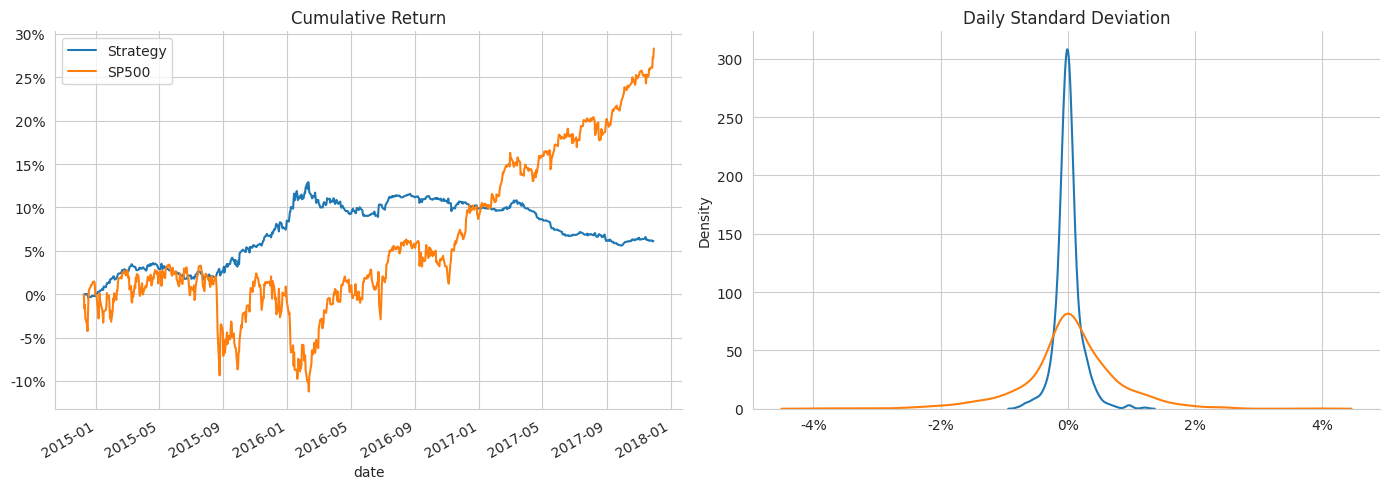

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
strategy.join(sp500).add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')
sns.distplot(strategy.dropna(), ax=axes[1], hist=False, label='Strategy')
sns.distplot(sp500, ax=axes[1], hist=False, label='SP500')
axes[1].set_title('Daily Standard Deviation')
axes[0].yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

In [ ]:
res = strategy.join(sp500).dropna()

In [ ]:
res.std()

Strategy    0.001979
SP500       0.007923
dtype: float64

In [ ]:
res.corr()

Strategy     SP500
Strategy  1.000000 -0.101723
SP500    -0.101723  1.000000

백터화 기반 백테스트는 신속한 back-of-the-envelope 평가를 허용하지만 강력하고 현실적이며 사용자 친화적인 백테스트 엔진의 중요한 특성을 놓친다.
- 예측과 수익률의 타임스탬프를 수동으로 정렬해야하며, 의도치 않은 선견 편향에 대한 안전장치가 없다.
- 명시적인 포지션 조정도 없고 비용 및 기타 시장 현실을 설명하는 트레이딩 프로세스나 포지션 및 성과를 추적하는 회계 시스템의 명시적인 표현도 없다.
- 또한 사후적으로 계산하는 것 이외의 다른 성과 측정은 없으며, 손절매와 같은 리스크 관리 규칙을 시뮬레이션하기 어렵다.

이벤트 기반 벡티스트 엔진
- 트레이딩의 시간 차원을 명시적으로 시뮬레이션하고 시뮬레이션에 훨씬 많은 구조를 부과한다.
- 타임스탬프를 적용하여 선견 평향과 기타 구현 오류를 방지하는 데 도움이 된다.


### 주요 구현 측면
현실적인 시뮬레이션 요건은 엔드투엔드 방식으로 프로세스의 모든 스텝을 지원하는 단일 플랫폼이나 각각 다른 측면에 전문화된 여러 도구를 통해 충족될 수 있다.

프로세스를 실행하기 위해 해결해야할 주요 항목과 구현 세부 정보는 다음과 같다.

#### 데이터 인제스트: 형태, 빈도, 타이밍
- 형태
    - 얼마나 많은 다양한 저장형식과 데이터 유형 지원할 것인지
    - 독점적 또는 사용자 지정 형식을 사용할 것인지
    - 제3자 또는 오픈소스 형식에 의존할 것인지
- 빈도
    - 데이터 소스의 빈도와 상이한 빈도의 소스를 결합할 수 있는지
- 타이밍
    - 데이터 인제스트는 선견 편향을 피하고자 시점 제약 조건도 해결해야 한다.


#### 팩터 공학: 내장 팩터 대 라이브러리
- 내장 팩터 공학의 주요 이점은 백테스트 파이프라인을 입력 데이터와 동일한 계산을 적용하는 실시간 트레이딩 엔진으로 쉽게 변환한다는 것이다.

- 수치 파이썬 라이브러리는 팩터를 미리 계산할 수 있는 대안이다.

#### ML 모델, 예측, 신호
- 모델 설계와 평가 부분을 백테스트 프로세스에 통합하는 엔드투엔트 플랫폼에 포함될 수 있다.


#### 트레이딩 규칙과 실행
- 현실적인 전략 시뮬레이션은 거래 환경을 충실히 표현해야한다.


#### 성과 평가
- 거래 계정에서 도출된 표준 성과 척도 또는 이러한 목적에 적합화된 파이폴리오와 같은 라이브러리로 사용할 수 있는 성과 척도의 출력을 제공할 수 있다.

## 백트레이더: 로컬 백테스트용 유연한 도구
- 백트레이더: 로컬 백테스트용 파이썬 라이브러리

#### 백트레더의 세리브로 구조의 주요 개념
- 백트레이더의 세레브로 구조는 파이썬 객체로서 백테스트 워크플로의 주요 구성 요소를 나타낸다.
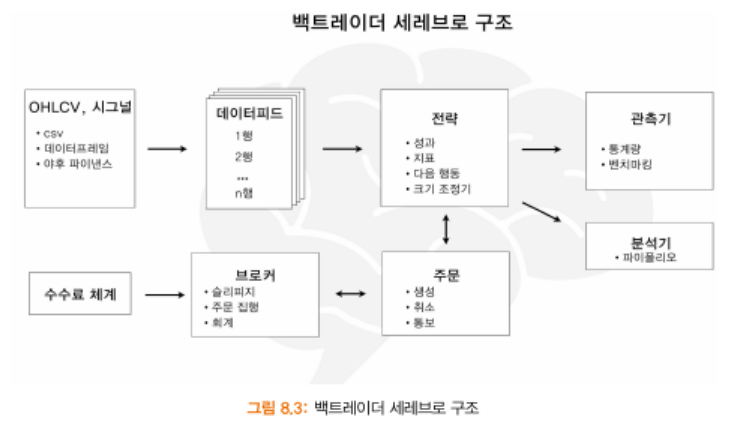


#### 데이터 피드, 행, 지표
- 데이터 피드: 전략의 기본 자료이며 각 관측에 대한 타임스탬프가 있는 OHLCV 시장 데이터와 같은 개별 증권에 대한 정보를 포함하지만, 사용 가능한 필드를 사용자가 지정할 수 있다.

일단 로딩되면 데이터 피드를 세레브로 인스턴스에 추가하며, 그 결과 수신된 순서에 따라 하나 이상의 전략에 데이터 피드를 사용할 수 있게 된다.

전략의 트레이딩 논리는 각 데이터 피드에 종목명(예. 티커) 또는 시퀀스 번호로 접근하고 데이터 피드의 모든 필드의 현재 및 과거 값을 검색할 수 있다. 각 필드를 라인이라고 한다.

백트레이더는 130개 이상의 일반적인 기술적 지표와 함께 제공되므로 각 데이터 피드에 대한 라인이나 기타 지표로부터 새로운 값을 계산해 전략을 구동할 수 있다. (표준 파이썬 연산을 사용해 새 값을 도출할 수도 있다.)

#### 데이터와 신호로부터 거래로: 전략
- 전략 객체에는 백테스트 실행 중 모든 바에서 세레브로 인스턴스가 제공하는 데이터 피드 정보를 기반으로 주문을 내는 트레이딩 논리가 포함돼 있다.
- 전략 인스턴스를 세레브로에 추가할 때 정의한 임의의 파라미터를 허용하도록 전략을 구성해 변형을 쉽게 테스트할 수 있다.

#### 수수료 체계 대신 수수료

당신의 전략이 각 바에서 현재 및 과거 데이터 포인트를 평가하면 어떤 주문을 낼지 결정해야 한다. 백트레이더를 사용하면 세레브로가 실행을 위해 브로커 인스턴스로 전달하는 여러 표준 주문 유형을 생성하고 각 바에서 결과에 대한 통지를 제공할 수 있다.

- 전략 메서드를 사용한 주문 실행 작동
    - 시장가 주문: 다음 시가 바에서 체결
    - 종가 주문: 다음 종가 바에서 체결
    - 지정가 주문: 유효 기간(선택 사항) 동안 가격 임곗값(예, 특정 가격까지만 매수)이 충족되는 경우에만 실행
    - 스탑 주문: 가격이 지정된 임곗값에 도달할 경우 시장가 주문이 된다.
    - 스탑 지정가 주문: 스탑이 발동된 후 지정가 주문이 된다.

#### 이 모든 것을 실현: 세레브로
- 세레브로 제어 시스템은 타임스탬프로 표시되는 바를 기반으로 데이터 피드를 동기화하고 이에 따라 이벤트별로 거래 로직과 브로커 행동을 실행한다.


### 실제에서 백트레이더를 사용하는 방법
- 세레브로 인스턴트를 만들고, 데이터를 로딩하고, 전략을 공식화 및 추가하고, 백테스트를 실행하고, 결과를 검토한다.

- 03_backtesting_with_backtrader.ipynb

# Backtesting an ML strategy with Backtrader

## Imports & Settings

In [ ]:
!pip install backtrader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 12.9 MB/s eta 0:00:00


In [ ]:
!pip install pyfolio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.1 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88663 sha256=13601b52cd084a140c085e68e56818b2fd6ea4a84f6a717e440f1d6e4e320f89
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39762 sha256=644dcd6d9a9dbe9836ea32155520db187440d136938c9522421b80b64562e194
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

from pathlib import Path
import csv
from time import time
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns

import backtrader as bt
from backtrader.feeds import PandasData

import pyfolio as pf

In [ ]:
pd.set_option('display.expand_frame_repr', False)
np.random.seed(42)
sns.set_style('darkgrid')

In [ ]:
def format_time(t):
    m_, s = divmod(t, 60)
    h, m = divmod(m_, 60)
    return f'{h:>02.0f}:{m:>02.0f}:{s:>02.0f}'

## Backtrader Setup

### Custom Commission Scheme

In [ ]:
class FixedCommisionScheme(bt.CommInfoBase):
    """
    Simple fixed commission scheme for demo
    """
    params = (
        ('commission', .02),
        ('stocklike', True),
        ('commtype', bt.CommInfoBase.COMM_FIXED),
    )

    def _getcommission(self, size, price, pseudoexec):
        return abs(size) * self.p.commission

### DataFrame Loader

In [ ]:
OHLCV = ['open', 'high', 'low', 'close', 'volume']

In [ ]:
class SignalData(PandasData):
    """
    Define pandas DataFrame structure
    """
    cols = OHLCV + ['predicted']

    # create lines
    lines = tuple(cols)

    # define parameters
    params = {c: -1 for c in cols}
    params.update({'datetime': None})
    params = tuple(params.items())

### Strategy

Includes an option to only trade on certain weekdays in lines 39/40.

In [ ]:
class MLStrategy(bt.Strategy):
    params = (('n_positions', 10),
              ('min_positions', 5),
              ('verbose', False),
              ('log_file', 'backtest.csv'))

    def log(self, txt, dt=None):
        """ Logger for the strategy"""
        dt = dt or self.datas[0].datetime.datetime(0)
        with Path(self.p.log_file).open('a') as f:
            log_writer = csv.writer(f)
            log_writer.writerow([dt.isoformat()] + txt.split(','))

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return

        # Check if an order has been completed
        # broker could reject order if not enough cash
        if self.p.verbose:
            if order.status in [order.Completed]:
                p = order.executed.price
                if order.isbuy():
                    self.log(f'{order.data._name},BUY executed,{p:.2f}')
                elif order.issell():
                    self.log(f'{order.data._name},SELL executed,{p:.2f}')

            elif order.status in [order.Canceled, order.Margin, order.Rejected]:
                self.log(f'{order.data._name},Order Canceled/Margin/Rejected')

    # bt calls prenext instead of next unless
    # all datafeeds have current values
    # => call next to avoid duplicating logic
    def prenext(self):
        self.next()

    def next(self):
        today = self.datas[0].datetime.date()
#         if today.weekday() not in [0, 3]: # only trade on Mondays;
#             return
        positions = [d._name for d, pos in self.getpositions().items() if pos]
        up, down = {}, {}
        missing = not_missing = 0
        for data in self.datas:
            if data.datetime.date() == today:
                if data.predicted[0] > 0:
                    up[data._name] = data.predicted[0]
                elif data.predicted[0] < 0:
                    down[data._name] = data.predicted[0]

        # sort dictionaries ascending/descending by value
        # returns list of tuples
        shorts = sorted(down, key=down.get)[:self.p.n_positions]
        longs = sorted(up, key=up.get, reverse=True)[:self.p.n_positions]
        n_shorts, n_longs = len(shorts), len(longs)

        # only take positions if at least min_n longs and shorts
        if n_shorts < self.p.min_positions or n_longs < self.p.min_positions:
            longs, shorts = [], []
        for ticker in positions:
            if ticker not in longs + shorts:
                self.order_target_percent(data=ticker, target=0)
                self.log(f'{ticker},CLOSING ORDER CREATED')

        short_target = -1 / max(self.p.n_positions, n_shorts)
        long_target = 1 / max(self.p.n_positions, n_longs)
        for ticker in shorts:
            self.order_target_percent(data=ticker, target=short_target)
            self.log('{ticker},SHORT ORDER CREATED')
        for ticker in longs:
            self.order_target_percent(data=ticker, target=long_target)
            self.log('{ticker},LONG ORDER CREATED')

### Create and Configure Cerebro Instance

In [ ]:
cerebro = bt.Cerebro()  # create a "Cerebro" instance
cash = 10000
# comminfo = FixedCommisionScheme()
# cerebro.broker.addcommissioninfo(comminfo)
cerebro.broker.setcash(cash)

### Add input data

In [ ]:
idx = pd.IndexSlice
data = pd.read_hdf('backtest.h5', 'data').sort_index()
tickers = data.index.get_level_values(0).unique()

for ticker in tickers:
    df = data.loc[idx[ticker, :], :].droplevel('ticker', axis=0)
    df.index.name = 'datetime'
    bt_data = SignalData(dataname=df)
    cerebro.adddata(bt_data, name=ticker)

### Run Strategy Backtest

In [ ]:
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
cerebro.addstrategy(MLStrategy, n_positions=25, min_positions=20,
                    verbose=True, log_file='bt_log.csv')
start = time()
results = cerebro.run()
ending_value = cerebro.broker.getvalue()
duration = time() - start

print(f'Final Portfolio Value: {ending_value:,.2f}')
print(f'Duration: {format_time(duration)}')

Final Portfolio Value: 9,571.66
Duration: 00:01:20


### Plot result

Disabled because large number of datafeeds all plot separately.

In [ ]:
cerebro.plot()  # plot the results
figure = cerebro.plot(style='candlebars')[0][0]
figure.savefig(f'backtrader.png')

<IPython.core.display.Javascript object>

### Get `pyfolio` inputs

In [ ]:
# prepare pyfolio inputs
pyfolio_analyzer = results[0].analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfolio_analyzer.get_pf_items()

returns.to_hdf('backtrader.h5', 'returns')
positions.to_hdf('backtrader.h5', 'positions')
transactions.to_hdf('backtrader.h5', 'transactions/')
gross_lev.to_hdf('backtrader.h5', 'gross_lev')

## Run pyfolio analysis

In [ ]:
returns = pd.read_hdf('backtrader.h5', 'returns')
positions = pd.read_hdf('backtrader.h5', 'positions')
transactions = pd.read_hdf('backtrader.h5', 'transactions/')
gross_lev = pd.read_hdf('backtrader.h5', 'gross_lev')

In [ ]:
benchmark = web.DataReader('SP500', 'fred', '2014', '2018').squeeze()
benchmark = benchmark.pct_change().tz_localize('UTC')

In [ ]:
daily_tx = transactions.groupby(level=0)
longs = daily_tx.value.apply(lambda x: x.where(x>0).sum())
shorts = daily_tx.value.apply(lambda x: x.where(x<0).sum())

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

df = returns.to_frame('Strategy').join(benchmark.to_frame('Benchmark (S&P 500)'))
df.add(1).cumprod().sub(1).plot(ax=axes[0], title='Cumulative Return')

longs.plot(label='Long',ax=axes[1], title='Positions')
shorts.plot(ax=axes[1], label='Short')
positions.cash.plot(ax=axes[1], label='PF Value')
axes[1].legend()
sns.despine()
fig.tight_layout();

<IPython.core.display.Javascript object>

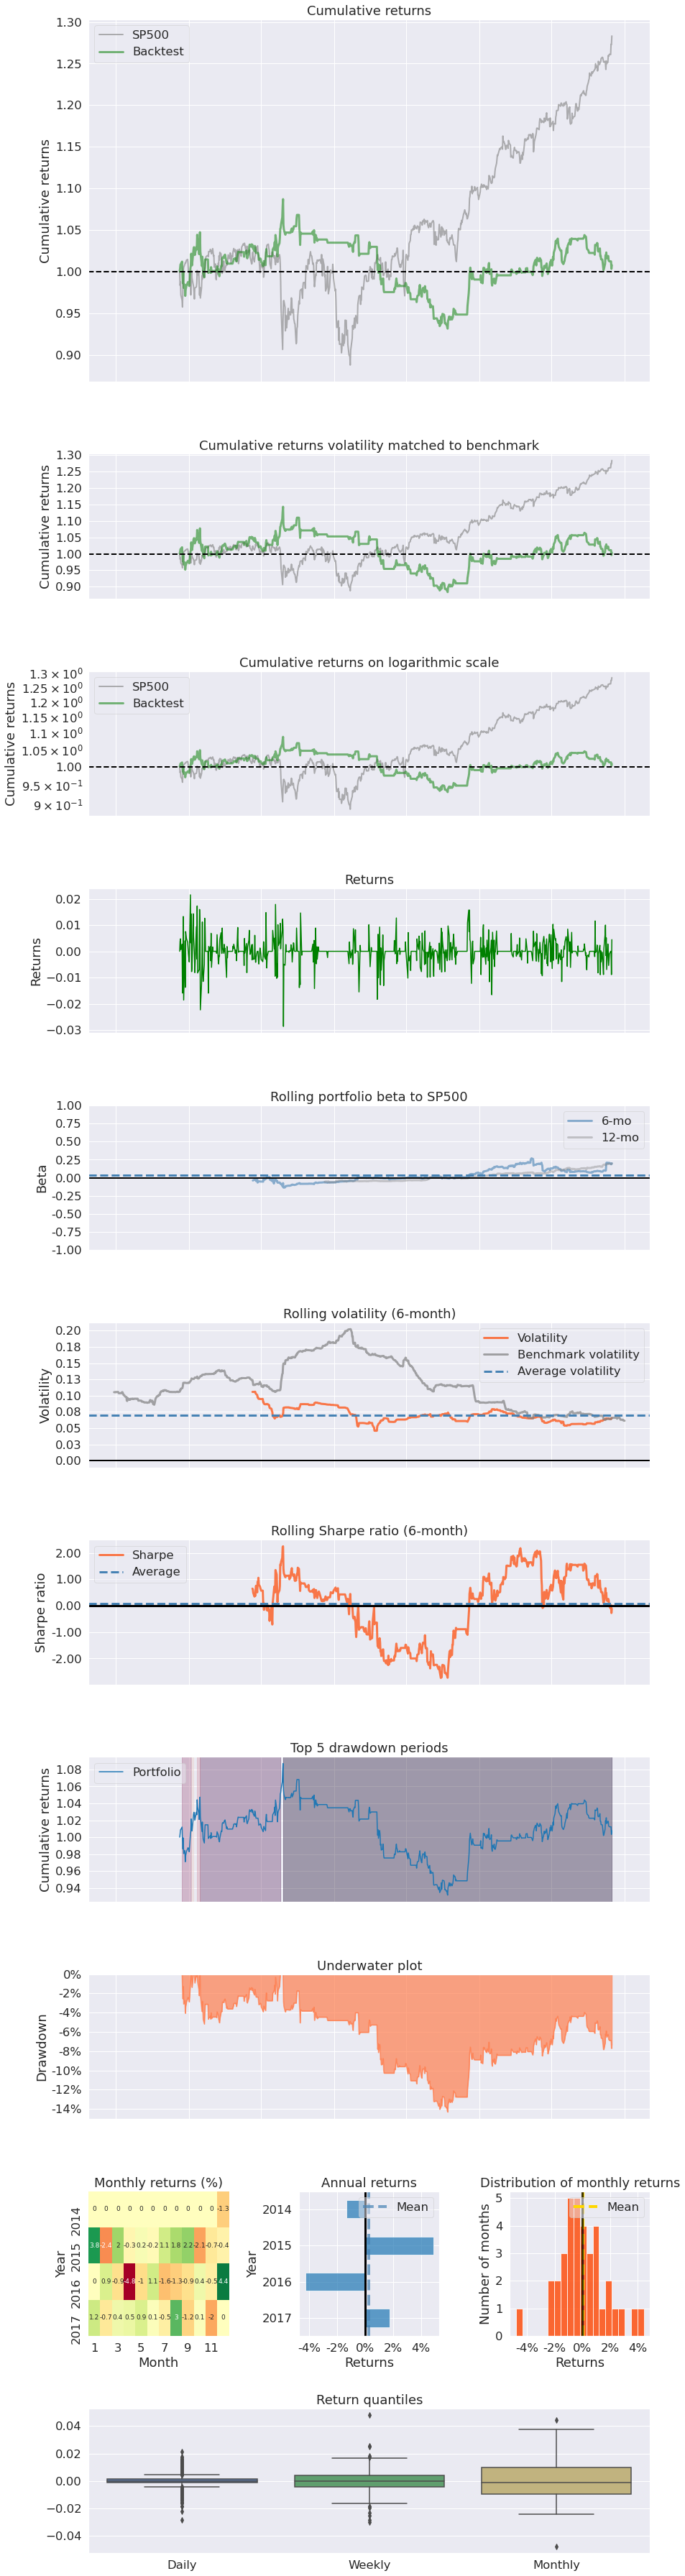

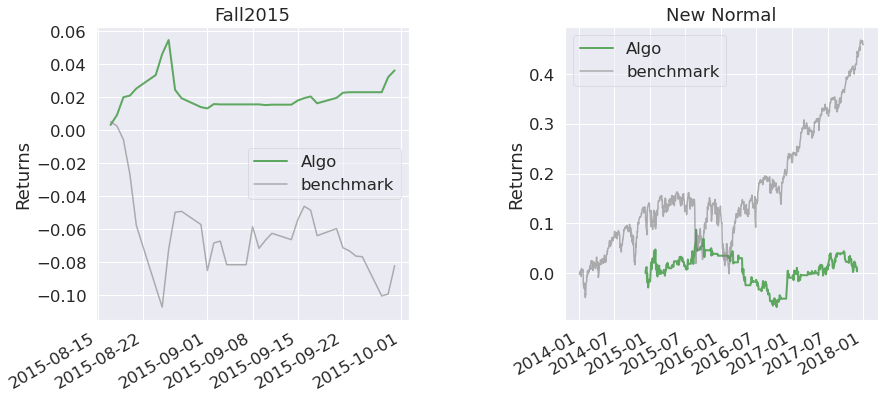

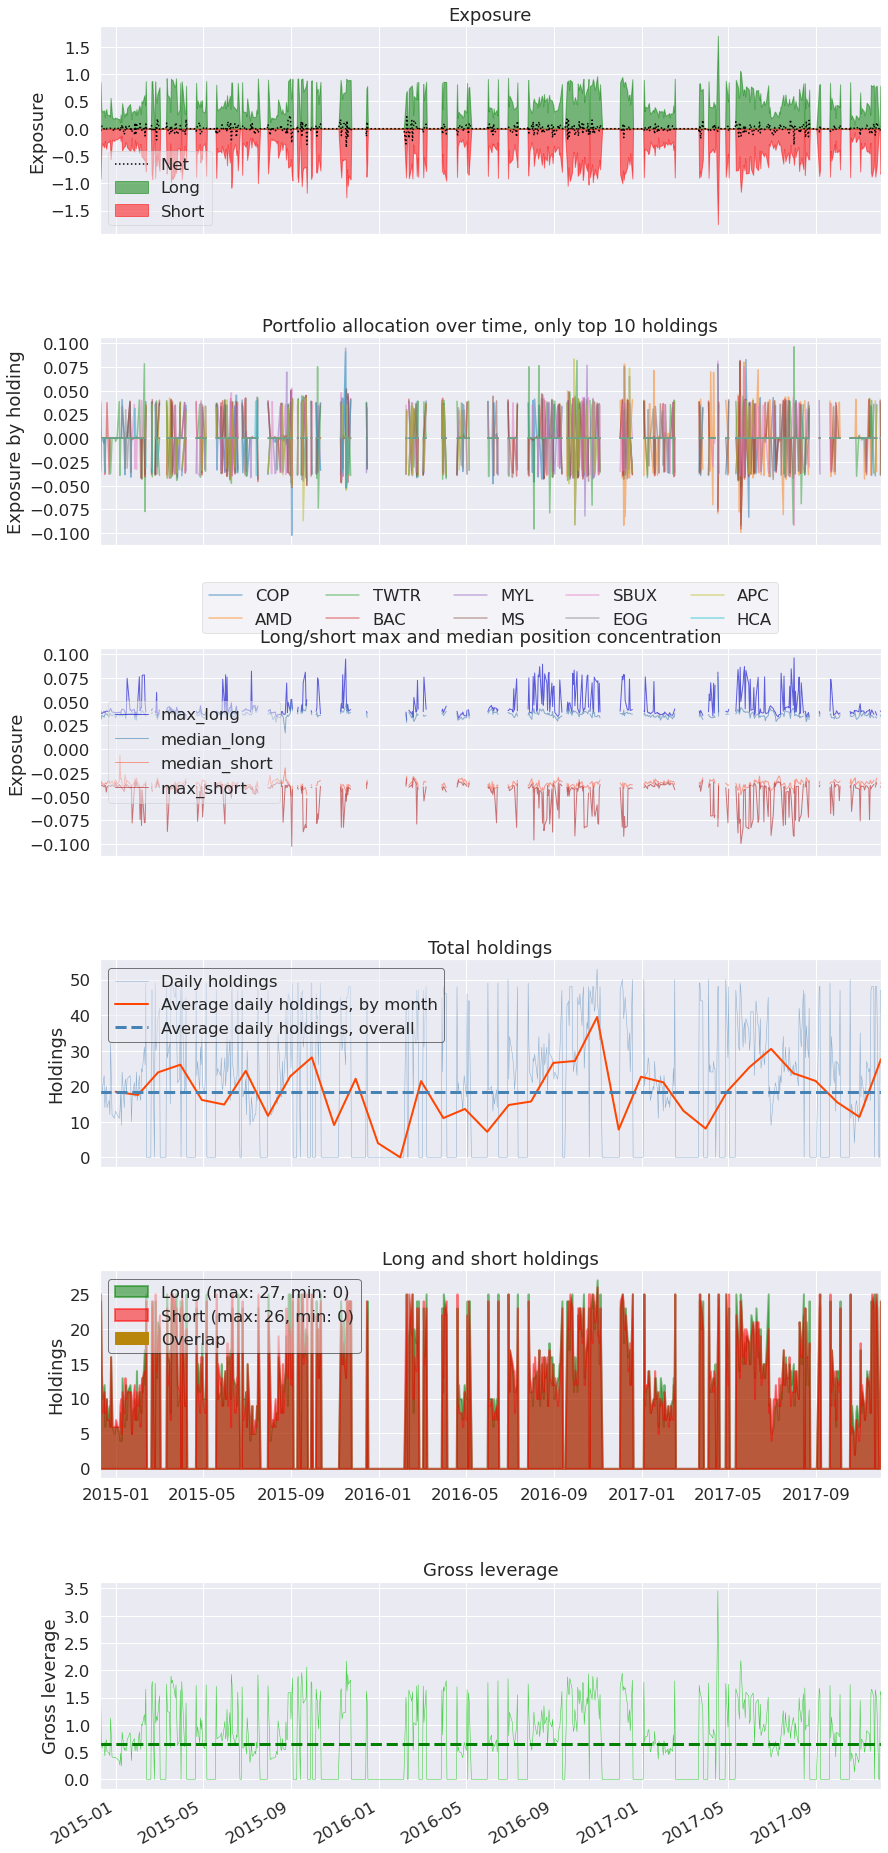

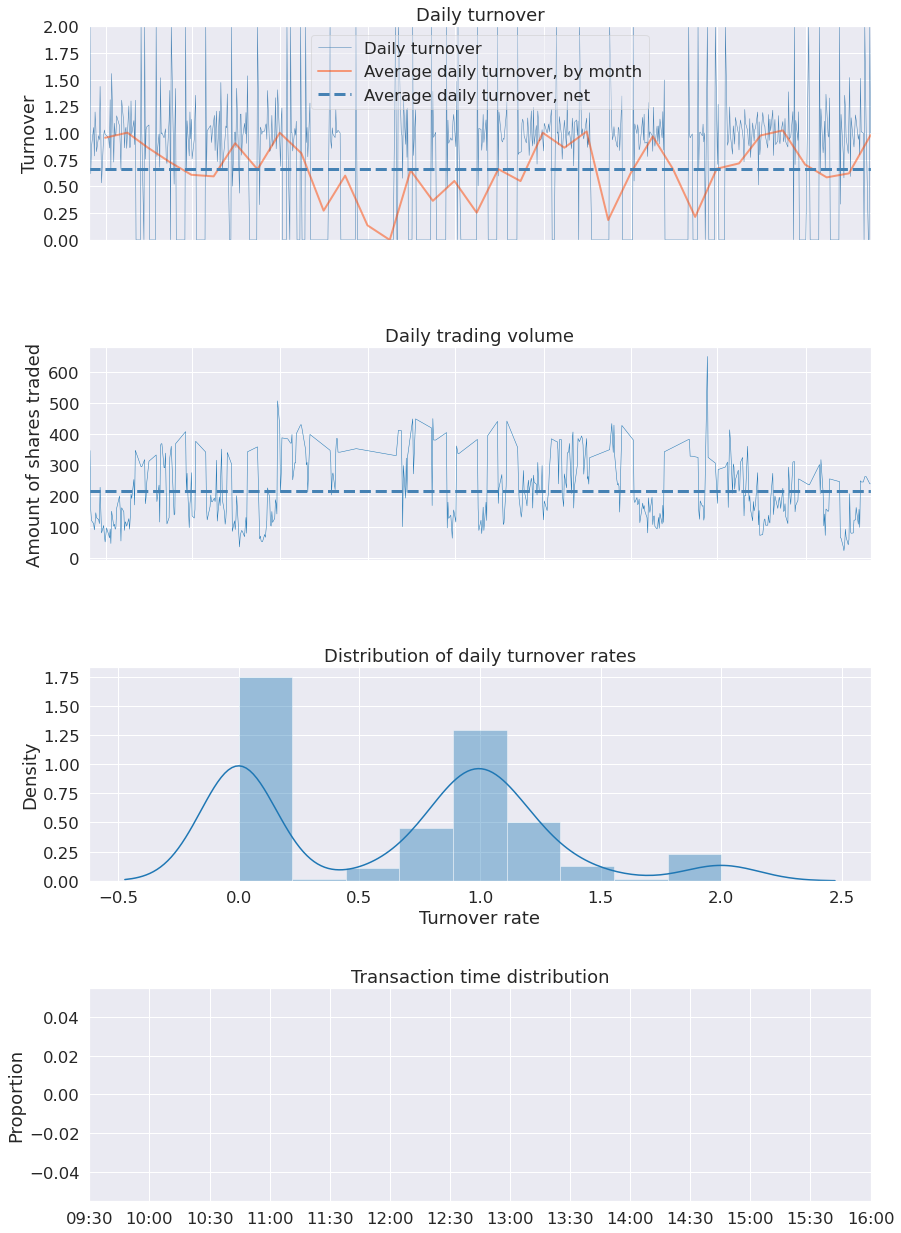

In [ ]:
pf.create_full_tear_sheet(returns,
                          transactions=transactions,
                          positions=positions,
                          benchmark_rets=benchmark.dropna())

#### 백트레이더 요약과 다음 단계
- 로컬 백테스트를 위한 간단하고 유연하며 성과 좋은 백테스트 엔진
- 판다스 호환성으로 광범위한 소스에서 원하는 빈도로 데이터 세트 로딩 가능
- 전략을 통해 임의의 트레이딩 로직을 정의 가능
- 파이폴리오와 잘 통합돼 빠르고 포괄적인 성과 평가 가능

## 집라인: 퀀토피안이 만든 확장 가능한 백테스트
- 백테스팅 엔진 집라인은 퀀토피안의 온라인 연구, 백테스팅, 실시간(모의) 거래 플랫폼을 지원한다.
- 헤지 편도로서 퀀토피안은 리스크 관리 기준에 따라 성능이 우수한 강력한 알고리듬을 식별하는 것을 목표로 한다.

#### 강건한 시뮬레이션을 위한 캘린더와 파이프라인
- 확장성과 신뢰성의 목표에 기여하는 주요 특성은 분할 및 배당에 대한 즉각적인 조정으로 OHLCV 시장 데이터를 저장하는 데이터 번들, 전 세계 거래소 운영 시간을 반영하는 거래 캘린더, 강력한 Pipline API다.

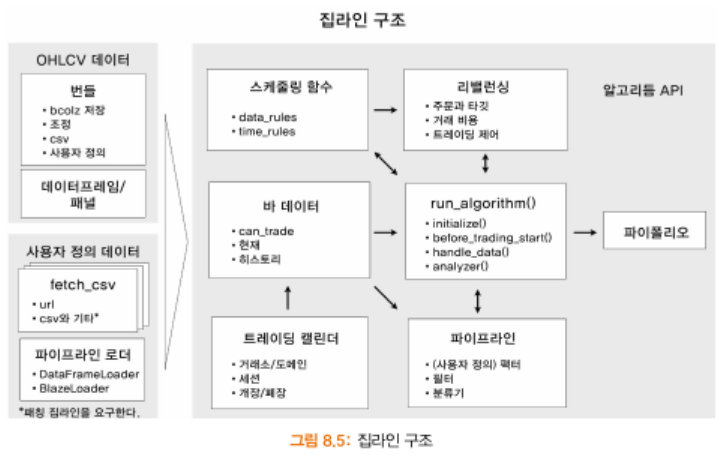

#### 번들: 즉각적인 조정이 가능한 시점 데이터
- 주 데이터 저장소는 SQLite 데이터베이스에 저장된 메타데이터와 함께 효율적인 검색을 위해 디스크에 있는 압축된 열 형태의 bcolz 형식으로 지정된 번들이다.
- 번들은 OHLCV 데이터만 포함되게 설계됐으며 일과 분 빈도로 제한된다.
    - 번들이 분할 및 배당 정보를 저장하고, 집라인은 백테스트에 대해 선택한 기간에 따라 시점 조정을 계산한다.

#### 알고리듬 API: 일정에 따른 백테스트
- 초기 설정 후 백테스트는 지정된 기간 동안 실행되며 특정 이벤트가 발생할 때 해당 트레이딩 로직을 실행한다.
- 이러한 이벤트는 일별 또는 분별 거래 빈도에 따라 발생하지만 신호를 평가하고 주문을 내고, 포트폴리오를 리밸런싱하거나 진행 중인 시뮬레이션에 대한 정보를 기록하기 위해 임의의 함수를 예약할 수도 있다.

#### 알려진 문제
- 현재 재무성 채권 곡선과 S&P 500 벤치마킹 수익률을 필요로 한다. 후자는 IEX API에 의존하며, 이제 키를 얻을 때 등록이 필요하다.

#### 분 데이터를 사용해 자체 번들 인제스트

1. OHCLV 데이터를 티커당 하나의 파일로 나누고 메타데이터를 저장하고 분할 및 배당 조정 작업을 수행한다.
2. 결과를 ingest() 함수에 전달하기 위한 스크립트를 작성해 번들을 bcolz 및 SQLite 형식으로 작성한다.
3. 홈 폴더의 .zipline 디렉터리에 있는 extension.py 스크립트에 번들을 등록하고 데이터 소스를 symlink한다.
4. AlgoSeek 데이터의 경우 NYSE 시장 시간 이외의 거래 활동을 포함하므로 사용자 정의 거래 일정도 제공한다.

In [ ]:
# algoseek_1min_trades.py
#!/usr/bin/env python
# -*- coding: utf-8 -*-
__author__ = 'Stefan Jansen'

from pathlib import Path
from os import getenv
import numpy as np
import pandas as pd

pd.set_option('display.expand_frame_repr', False)
np.random.seed(42)

"""
This code is based on Algoseek's NASDAQ100 minute-bar trade data.
Please refer to the README for a brief summary on how you could adapt this code for your purposes.
"""

ZIPLINE_ROOT = getenv('ZIPLINE_ROOT')
if not ZIPLINE_ROOT:
    custom_data_path = Path('~/.zipline/custom_data').expanduser()
else:
    custom_data_path = Path(ZIPLINE_ROOT, 'custom_data')


def load_equities():
    return pd.read_hdf(custom_data_path / 'algoseek.h5', 'equities')


def ticker_generator():
    """
    Lazily return (sid, ticker) tuple
    """
    return (v for v in load_equities().values)


def data_generator():
    for sid, symbol, asset_name in ticker_generator():
        df = (pd.read_hdf(custom_data_path / 'algoseek.h5', str(sid))
              .tz_localize('US/Eastern')
              .tz_convert('UTC'))

        start_date = df.index[0]
        end_date = df.index[-1]

        first_traded = start_date.date()
        auto_close_date = end_date + pd.Timedelta(days=1)
        exchange = 'AlgoSeek'

        yield (sid, df), symbol, asset_name, start_date, end_date, first_traded, auto_close_date, exchange


def metadata_frame():
    dtype = [
        ('symbol', 'object'),
        ('asset_name', 'object'),
        ('start_date', 'datetime64[ns]'),
        ('end_date', 'datetime64[ns]'),
        ('first_traded', 'datetime64[ns]'),
        ('auto_close_date', 'datetime64[ns]'),
        ('exchange', 'object'), ]
    return pd.DataFrame(np.empty(len(load_equities()), dtype=dtype))


def algoseek_to_bundle(interval='1m'):
    def ingest(environ,
               asset_db_writer,
               minute_bar_writer,
               daily_bar_writer,
               adjustment_writer,
               calendar,
               start_session,
               end_session,
               cache,
               show_progress,
               output_dir
               ):
        metadata = metadata_frame()

        def minute_data_generator():
            return (sid_df for (sid_df, *metadata.iloc[sid_df[0]]) in data_generator())

        minute_bar_writer.write(minute_data_generator(), show_progress=True)

        metadata.dropna(inplace=True)
        asset_db_writer.write(equities=metadata)
        adjustment_writer.write(splits=pd.read_hdf(custom_data_path / 'algoseek.h5', 'splits'))
        # dividends do not work
        # adjustment_writer.write(dividends=pd.read_hdf(custom_data_path / 'algoseek.h5', 'dividends'))

    return ingest

In [ ]:
# algoseek_preprocessing.py
#!/usr/bin/env python
# -*- coding: utf-8 -*-
__author__ = 'Stefan Jansen'

import sqlite3
from pathlib import Path
from os import getenv
import numpy as np
import pandas as pd
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols

np.random.seed(42)

idx = pd.IndexSlice

"""
This code is based on Algoseek's NASDAQ100 minute-bar trade data.
Please refer to the README for a brief summary on how you could adapt this code for your purposes.
"""


PROJECT_DIR = Path('..', '..')
data_path = PROJECT_DIR / 'data' / 'nasdaq100'

ZIPLINE_ROOT = getenv('ZIPLINE_ROOT')
if not ZIPLINE_ROOT:
    quandl_path = Path('~', '.zipline', 'data', 'quandl').expanduser()
else:
    quandl_path = Path(ZIPLINE_ROOT, 'data', 'quandl')

downloads = sorted([f.name for f in quandl_path.iterdir() if f.is_dir()])
if not downloads:
    print('Need to run "zipline ingest" first')
    exit()

download_timestamp = downloads[-1]
adj_db_path = quandl_path / 'adjustments.sqlite'
equities_db_path = quandl_path / 'assets-7.sqlite'


def read_sqlite(table, con):
    return pd.read_sql("SELECT * FROM " + table, con=con).dropna(how='all', axis=1)


def get_equities():
    nasdaq100 = pd.read_hdf(data_path / 'data.h5', '1min_trades')

    equities_con = sqlite3.connect(equities_db_path.as_posix())
    equities = read_sqlite('equity_symbol_mappings', equities_con)

    all_tickers = nasdaq100.index.get_level_values('ticker').unique()
    tickers_with_meta = np.sort(all_tickers.intersection(pd.Index(equities.symbol)))

    nasdaq_info = (get_nasdaq_symbols()
                   .reset_index()
                   .rename(columns=lambda x: x.lower().replace(' ', '_'))
                   .loc[:, ['symbol', 'security_name']]
                   .rename(columns={'security_name': 'asset_name'}))
    nasdaq_tickers = pd.DataFrame({'symbol': tickers_with_meta}).merge(nasdaq_info, how='left')
    nasdaq_sids = (equities.loc[equities.symbol.isin(nasdaq_tickers.symbol),
                                ['symbol', 'sid']])
    nasdaq_tickers = (nasdaq_tickers.merge(nasdaq_sids, how='left')
                      .reset_index()
                      .rename(columns={'sid': 'quandl_sid', 'index': 'sid'}))
    nasdaq_tickers.to_hdf('algoseek.h5', 'equities')


def get_dividends():
    equities = pd.read_hdf('algoseek.h5', 'equities')

    adjustments_con = sqlite3.connect(adj_db_path.as_posix())
    div_cols = ['sid', 'ex_date', 'declared_date', 'pay_date', 'record_date', 'amount']

    dividends = read_sqlite('dividend_payouts', adjustments_con)[['sid', 'ex_date', 'amount']]
    dividends = (dividends.rename(columns={'sid': 'quandl_sid'})
                 .merge(equities[['quandl_sid', 'sid']])
                 .drop('quandl_sid', axis=1))
    print(dividends.loc[:, div_cols].info())
    dividends.reindex(div_cols, axis=1).to_hdf('algoseek.h5', 'dividends')


def get_splits():
    split_cols = ['sid', 'effective_date', 'ratio']
    equities = pd.read_hdf('algoseek.h5', 'equities')
    adjustments_con = sqlite3.connect(adj_db_path.as_posix())
    splits = read_sqlite('splits', adjustments_con)[split_cols]
    splits = (splits.rename(columns={'sid': 'quandl_sid'})
              .merge(equities[['quandl_sid', 'sid']])
              .drop('quandl_sid', axis=1)
              )
    print(splits.loc[:, split_cols].info())
    splits.loc[:, split_cols].to_hdf('algoseek.h5', 'splits')


def get_ohlcv_by_ticker():
    equities = pd.read_hdf('algoseek.h5', 'equities')
    col_dict = {'first': 'open', 'last': 'close'}
    nasdaq100 = (pd.read_hdf(data_path / 'data.h5', '1min_trades')
                 .loc[idx[equities.symbol, :], :]
                 .rename(columns=col_dict))
    print(nasdaq100.info())

    symbol_dict = equities.set_index('symbol').sid.to_dict()
    for symbol, data in nasdaq100.groupby(level='ticker'):
        print(symbol)
        data.reset_index('ticker', drop=True).to_hdf('algoseek.h5', '{}'.format(symbol_dict[symbol]))

    equities.drop('quandl_sid', axis=1).to_hdf('algoseek.h5', 'equities')

In [ ]:
# extension.py
import sys
from pathlib import Path

sys.path.append(Path('~', '.zipline').expanduser().as_posix())
from zipline.data.bundles import register
from algoseek_1min_trades import algoseek_to_bundle
from datetime import time
from pytz import timezone
from trading_calendars import register_calendar
from trading_calendars.exchange_calendar_xnys import XNYSExchangeCalendar

"""
This code is based on Algoseek's NASDAQ100 minute-bar trade data.
Please refer to the README for a brief summary on how you could adapt this code for your purposes.
"""


class AlgoSeekCalendar(XNYSExchangeCalendar):
    """
    A calendar for trading assets before and after market hours

    Open Time: 4AM, US/Eastern
    Close Time: 19:59PM, US/Eastern
    """

    @property
    def name(self):
        """
        The name of the exchange that zipline
        looks for when we run our algorithm
        """
        return "AlgoSeek"

    @property
    def tz(self):
        return timezone("US/Eastern")

    open_times = (
        (None, time(4, 1)),
    )

    close_times = (
        (None, time(19, 59)),
    )


register_calendar(
        'AlgoSeek',
        AlgoSeekCalendar()
)

register('algoseek',
         algoseek_to_bundle(),
         calendar_name='AlgoSeek',
         minutes_per_day=960
         )



### 파이프라인 API: ML 신호 백테스트
- Pieline API는 과거 데이터로부터 유가 증권의 횡단면에 대한 알파 팩터의 정의와 계산을 용이하게 한다.
- 이벤트 기반 구조를 계속 따르지만 가능한 경우 팩터의 계산을 벡터와 한다.

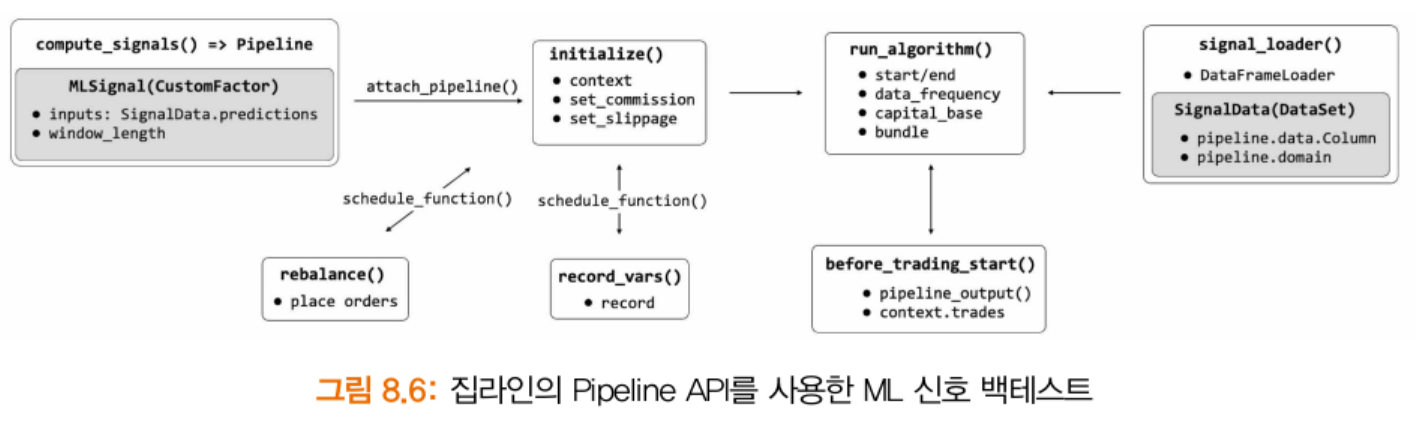

- 02_backtesting_with_zipline.ipynb

# Backtesting with zipline - Pipeline API with Custom Data

The [Pipeline API](https://www.quantopian.com/docs/user-guide/tools/pipeline) facilitates the definition and computation of alpha factors for a cross-section of securities from historical data. The Pipeline significantly improves efficiency because it optimizes computations over the entire backtest period rather than tackling each event separately. In other words, it continues to follow an event-driven architecture but vectorizes the computation of factors where possible.

A Pipeline uses Factors, Filters, and Classifiers classes to define computations that produce columns in a table with PIT values for a set of securities. Factors take one or more input arrays of historical bar data and produce one or more outputs for each security. There are numerous built-in factors, and you can also design your own `CustomFactor` computations.

The following figure depicts how loading the data using the `DataFrameLoader`, computing the predictive `MLSignal` using the Pipeline API, and various scheduled activities integrate with the overall trading algorithm executed via the `run_algorithm()` function. We go over the details and the corresponding code in this section.

![The Pipeline Workflow](../../assets/zip_pipe_flow.png)

You need to register your Pipeline with the `initialize()` method and can then execute it at each time step or on a custom schedule. Zipline provides numerous built-in computations such as moving averages or Bollinger Bands that can be used to quickly compute standard factors, but it also allows for the creation of custom factors as we will illustrate next.

Most importantly, the Pipeline API renders alpha factor research modular because it separates the alpha factor computation from the remainder of the algorithm, including the placement and execution of trade orders and the bookkeeping of portfolio holdings, values, and so on.

The goal is to combine the daily return predictions with the OHCLV data from our Quandl bundle and then to go long on up to 10 equities with the highest predicted returns and short on those with the lowest predicted returns, requiring at least five stocks on either side similar to the backtrader example above. See comments in the notebook for implementation details.

## Imports & Settings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from collections import defaultdict
from time import time

import numpy as np
import pandas as pd
import pandas_datareader.data as web
from logbook import Logger, StderrHandler, INFO

import matplotlib.pyplot as plt
import seaborn as sns

from zipline import run_algorithm
from zipline.api import (attach_pipeline,
                         pipeline_output,
                         date_rules,
                         time_rules,
                         record,
                         schedule_function,
                         commission,
                         slippage,
                         set_slippage,
                         set_commission,
                         order_target,
                         order_target_percent)
from zipline.data import bundles
from zipline.utils.run_algo import load_extensions
from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.data import Column, DataSet
from zipline.pipeline.domain import US_EQUITIES
from zipline.pipeline.filters import StaticAssets
from zipline.pipeline.loaders.frame import DataFrameLoader

import pyfolio as pf
from pyfolio.plotting import plot_rolling_returns, plot_rolling_sharpe
from pyfolio.timeseries import forecast_cone_bootstrap

In [ ]:
sns.set_style('whitegrid')
pd.set_option('display.expand_frame_repr', False)
np.random.seed(42)

### Load zipline extensions

Only need this in notebook to find bundle.

In [ ]:
load_extensions(default=True,
                extensions=[],
                strict=True,
                environ=None)

In [ ]:
log_handler = StderrHandler(format_string='[{record.time:%Y-%m-%d %H:%M:%S.%f}]: ' +
                            '{record.level_name}: {record.func_name}: {record.message}',
                            level=INFO)
log_handler.push_application()
log = Logger('Algorithm')

## Algo Params

We plan to hold up to 20 long and 20 short positions whenever there are at least 10 on either side that meet the criteria (positive/negative prediction for long/short position).

In [ ]:
N_LONGS = 20
N_SHORTS = 20
MIN_POSITIONS = 10

## Load Data

### Quandl Wiki Bundle

Load the Wiki Quandl `bundle` data that we ingested earlier using `zipline ingest`. This gives us access to the security SID values, among other things.

In [ ]:
bundle_data = bundles.load('quandl')

### ML Predictions

We load our predictions for the 2015-17 period and extract the Zipline IDs for the ~250 stocks in our universe during this period using the `bundle.asset_finder.lookup_symbols()` method:

In [ ]:
def load_predictions(bundle):
    predictions = pd.read_hdf('../00_data/backtest.h5', 'data')[['predicted']].dropna()
    tickers = predictions.index.get_level_values(0).unique().tolist()

    assets = bundle.asset_finder.lookup_symbols(tickers, as_of_date=None)
    predicted_sids = pd.Int64Index([asset.sid for asset in assets])
    ticker_map = dict(zip(tickers, predicted_sids))
    return (predictions
            .unstack('ticker')
            .rename(columns=ticker_map)
            .predicted
            .tz_localize('UTC')), assets

In [ ]:
predictions, assets = load_predictions(bundle_data)

### Define Custom Dataset

To merge additional columns with our bundle, we define a custom `SignalData` class that inherits from `zipline.pipeline.DataSset` and contains a single `zipline.pipeline.Column` of type `float` and has the domain `US_EQUITIES`:

In [ ]:
class SignalData(DataSet):
    predictions = Column(dtype=float)
    domain = US_EQUITIES

### Define Pipeline Loaders

While the bundle’s OHLCV data can rely on the built-in `USEquityPricingLoader`, we need to define our own `zipline.pipeline.loaders.frame.DataFrameLoader`:

In [ ]:
signal_loader = {SignalData.predictions: DataFrameLoader(SignalData.predictions,
                                                         predictions)}

In fact, we need to slightly modify the Zipline library’s source code to bypass the assumption that we will only load price data. To this end, we will add a `custom_loader` parameter to the `run_algorithm` and ensure that this loader is used when the `Pipeline` needs one of `SignalData`’s `Column` instances.

## Pipeline Setup

Our Pipeline is going to have two Boolean columns that identify the assets we would like to trade as long and short positions.

To get there, we first define a `CustomFactor` called `MLSignal` that just receives the current `SignalData.predictions`. The motivation is to allow us to use some of the convenient `Factor` methods designed to rank and filter securities.

### Custom ML Factor

In [ ]:
class MLSignal(CustomFactor):
    """Converting signals to Factor
        so we can rank and filter in Pipeline"""
    inputs = [SignalData.predictions]
    window_length = 1

    def compute(self, today, assets, out, preds):
        out[:] = preds

### Create Pipeline

Now we create a `compute_signals()` that returns a `zipline.pipeline.Pipeline` which filters the assets that meet our long/short criteria. We will call ths function periodically while executing the backtest.

More specifically, we set up our Pipeline by instantiating the `CustomFactor` that requires no arguments other than the defaults. We combine its `top()` and `bottom()` methods with a filter to select the highest positive and lowest negative predictions:

In [ ]:
def compute_signals():
    signals = MLSignal()
#     predictions = SignalData.predictions.latest
    return Pipeline(columns={
        'longs' : signals.top(N_LONGS, mask=signals > 0),
        'shorts': signals.bottom(N_SHORTS, mask=signals < 0)},
            screen=StaticAssets(assets)
    )

## Initialize Algorithm

The `initialize()` function is part of the Algorithm API. It permits us to add entries to the `context` dictionary available to all backtest components, set parameters like commission and slippage, and schedule functions. We also attach our Pipeline to the algorithm:

In [ ]:
def initialize(context):
    """
    Called once at the start of the algorithm.
    """
    context.n_longs = N_LONGS
    context.n_shorts = N_SHORTS
    context.min_positions = MIN_POSITIONS
    context.universe = assets

    set_slippage(slippage.FixedSlippage(spread=0.00))
    set_commission(commission.PerShare(cost=0, min_trade_cost=0))

    schedule_function(rebalance,
                      date_rules.every_day(),
                      time_rules.market_open(hours=1, minutes=30))

    schedule_function(record_vars,
                      date_rules.every_day(),
                      time_rules.market_close())

    pipeline = compute_signals()
    attach_pipeline(pipeline, 'signals')

### Get daily Pipeline results

The algorithm calls the `before_trading_start()` function every day before market opens and we use it to obtain the current pipeline values, i.e., the assets suggested for long and short positions based on the ML model predictions:

In [ ]:
def before_trading_start(context, data):
    """
    Called every day before market open.
    """
    output = pipeline_output('signals')
    context.trades = (output['longs'].astype(int)
                      .append(output['shorts'].astype(int).mul(-1))
                      .reset_index()
                      .drop_duplicates()
                      .set_index('index')
                      .squeeze())

## Define Rebalancing Logic

The `rebalance()` function takes care of adjusting the portfolio positions to reflect the target long and short positions implied by the model forecasets:

In [ ]:
def rebalance(context, data):
    """
    Execute orders according to schedule_function() date & time rules.
    """
    trades = defaultdict(list)

    for stock, trade in context.trades.items():
        if not trade:
            order_target(stock, 0)
        else:
            trades[trade].append(stock)
    context.longs, context.shorts = len(trades[1]), len(trades[-1])
    if context.longs > context.min_positions and context.shorts > context.min_positions:
        for stock in trades[-1]:
            order_target_percent(stock, -1 / context.shorts)
        for stock in trades[1]:
            order_target_percent(stock, 1 / context.longs)

## Record Data Points

The `record_vars()` logs information to the `pd.DataFrame` returned by `run_algorithm()` as scheduled.

In [ ]:
def record_vars(context, data):
    """
    Plot variables at the end of each day.
    """
    record(leverage=context.account.leverage,
           longs=context.longs,
           shorts=context.shorts)

## Run Algorithm

At this point, we have defined all ingredients for the algorithm and are ready to call `run_algorithm()` with the desired `start` and `end` dates, references to the various functions we just created, and the `custom_loader` to ensure our model predictions are available to the backtest.

In [ ]:
dates = predictions.index.get_level_values('date')
start_date = dates.min()
end_date = (dates.max() + pd.DateOffset(1))

In [ ]:
start_date, end_date

(Timestamp('2014-12-09 00:00:00+0000', tz='UTC'),
 Timestamp('2017-11-30 00:00:00+0000', tz='UTC'))

In [ ]:
start = time()
results = run_algorithm(start=start_date,
                       end=end_date,
                       initialize=initialize,
                       before_trading_start=before_trading_start,
                       capital_base=1e6,
                       data_frequency='daily',
                       bundle='quandl',
                       custom_loader=signal_loader) # need to modify zipline

print('Duration: {:.2f}s'.format(time() - start))

[2021-04-15 20:20:38.396565]: INFO: handle_split: after split: asset: Equity(2509 [SBUX]), amount: 1078, cost_basis: 47.62, last_sale_price: 95.23
[2021-04-15 20:20:38.397135]: INFO: handle_split: returning cash: 0.0
[2021-04-15 20:21:29.224476]: INFO: handle_simulation_end: Simulated 751 trading days
first open: 2014-12-09 14:31:00+00:00
last close: 2017-11-30 21:00:00+00:00


Duration: 59.04s


## Performance Analysis with PyFolio

Now we can evaluate the results using `pyfolio` tearsheets or its various `pyfolio.plotting` functions.

In [ ]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

In [ ]:
benchmark = web.DataReader('SP500', 'fred', '2014', '2018').squeeze()
benchmark = benchmark.pct_change().tz_localize('UTC')

In [ ]:
LIVE_DATE = '2017-01-01'

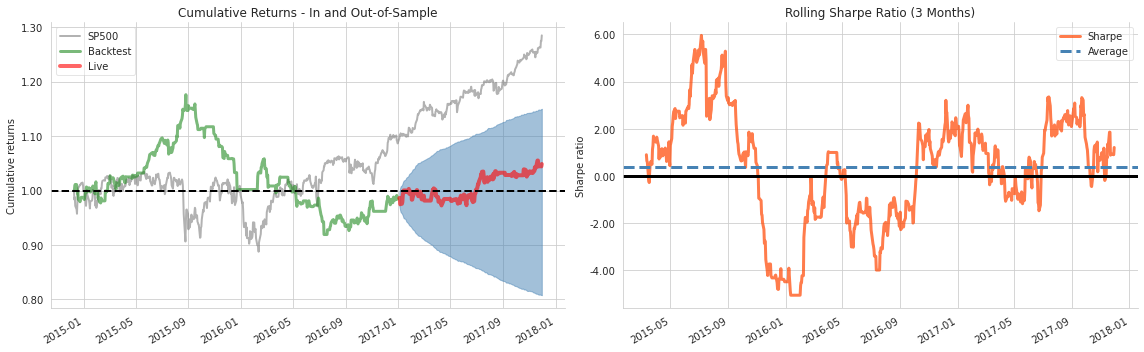

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
plot_rolling_returns(returns,
                     factor_returns=benchmark,
                     live_start_date=LIVE_DATE,
                     logy=False,
                     cone_std=2,
                     legend_loc='best',
                     volatility_match=False,
                     cone_function=forecast_cone_bootstrap,
                    ax=axes[0])
plot_rolling_sharpe(returns, ax=axes[1], rolling_window=63)
axes[0].set_title('Cumulative Returns - In and Out-of-Sample')
axes[1].set_title('Rolling Sharpe Ratio (3 Months)')
sns.despine()
fig.tight_layout();

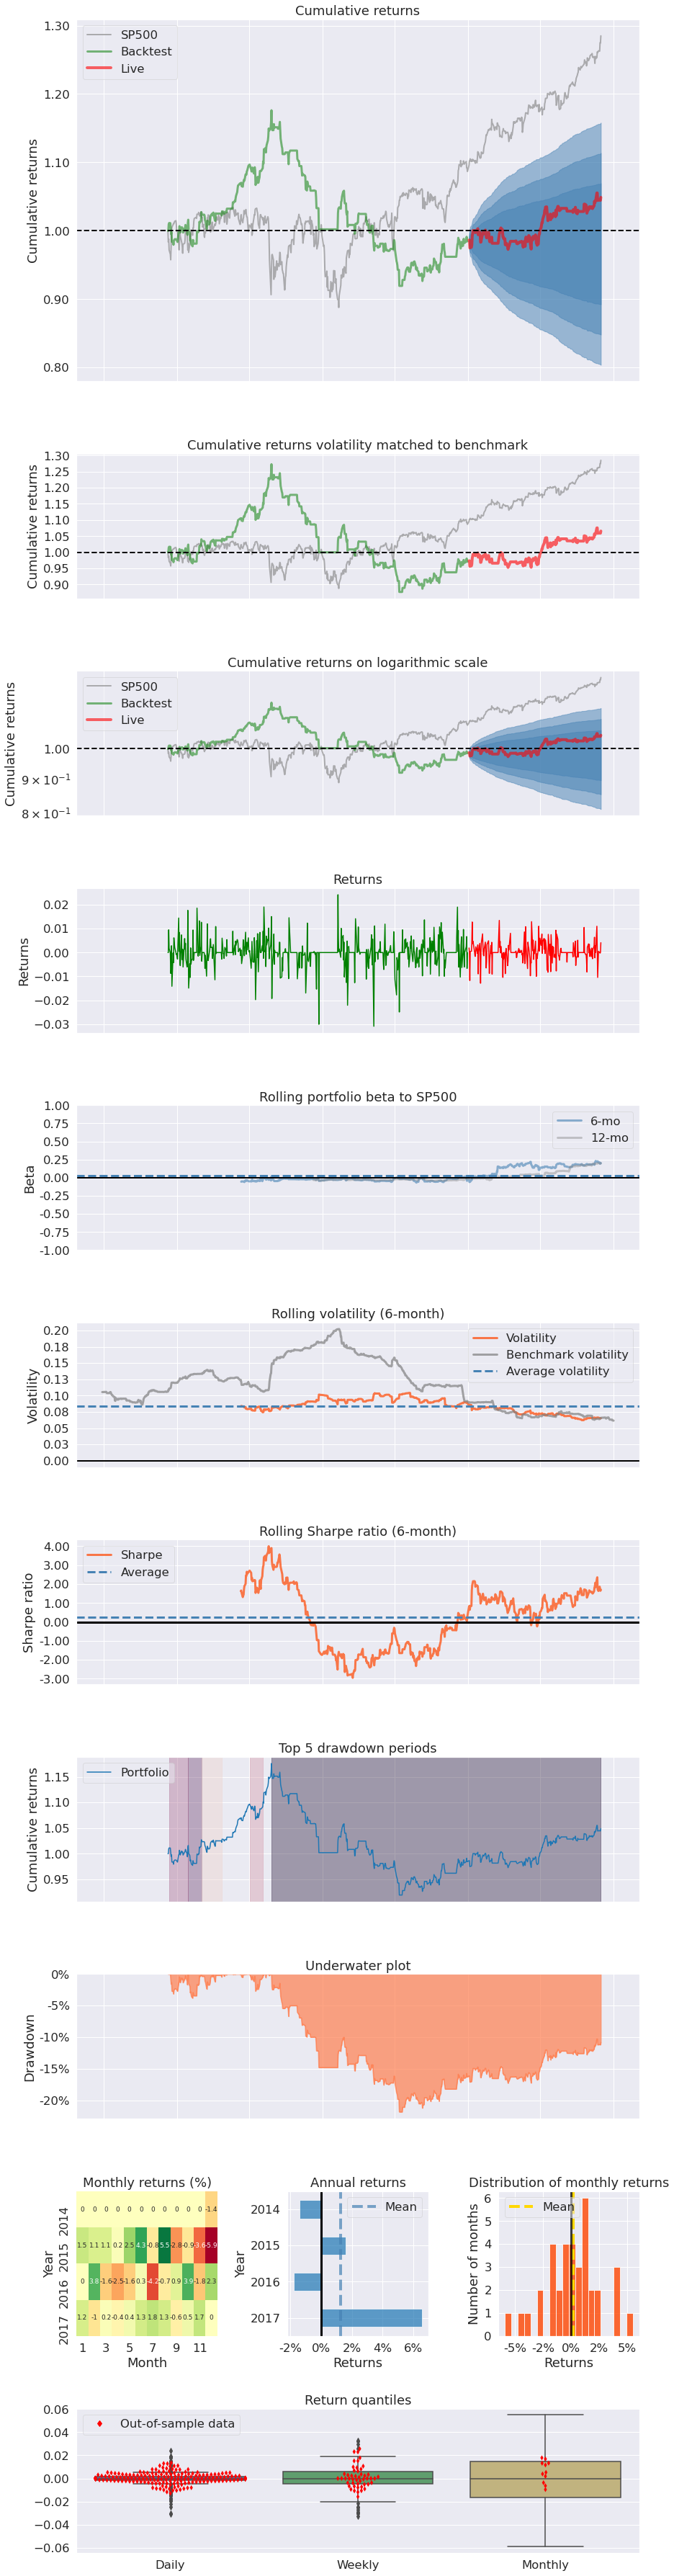

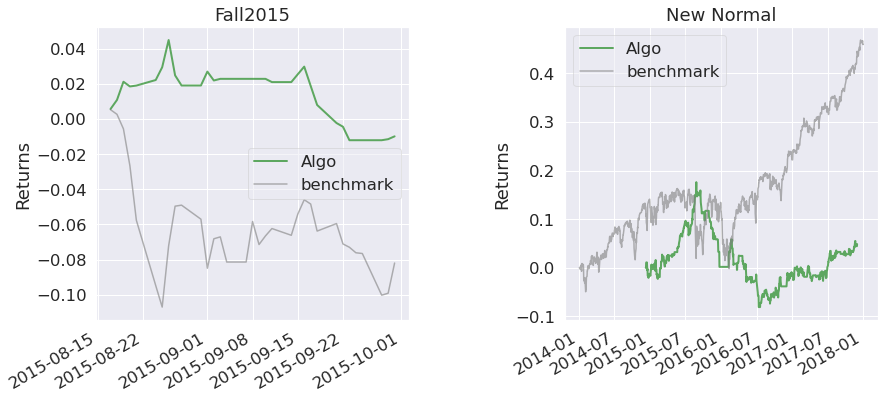

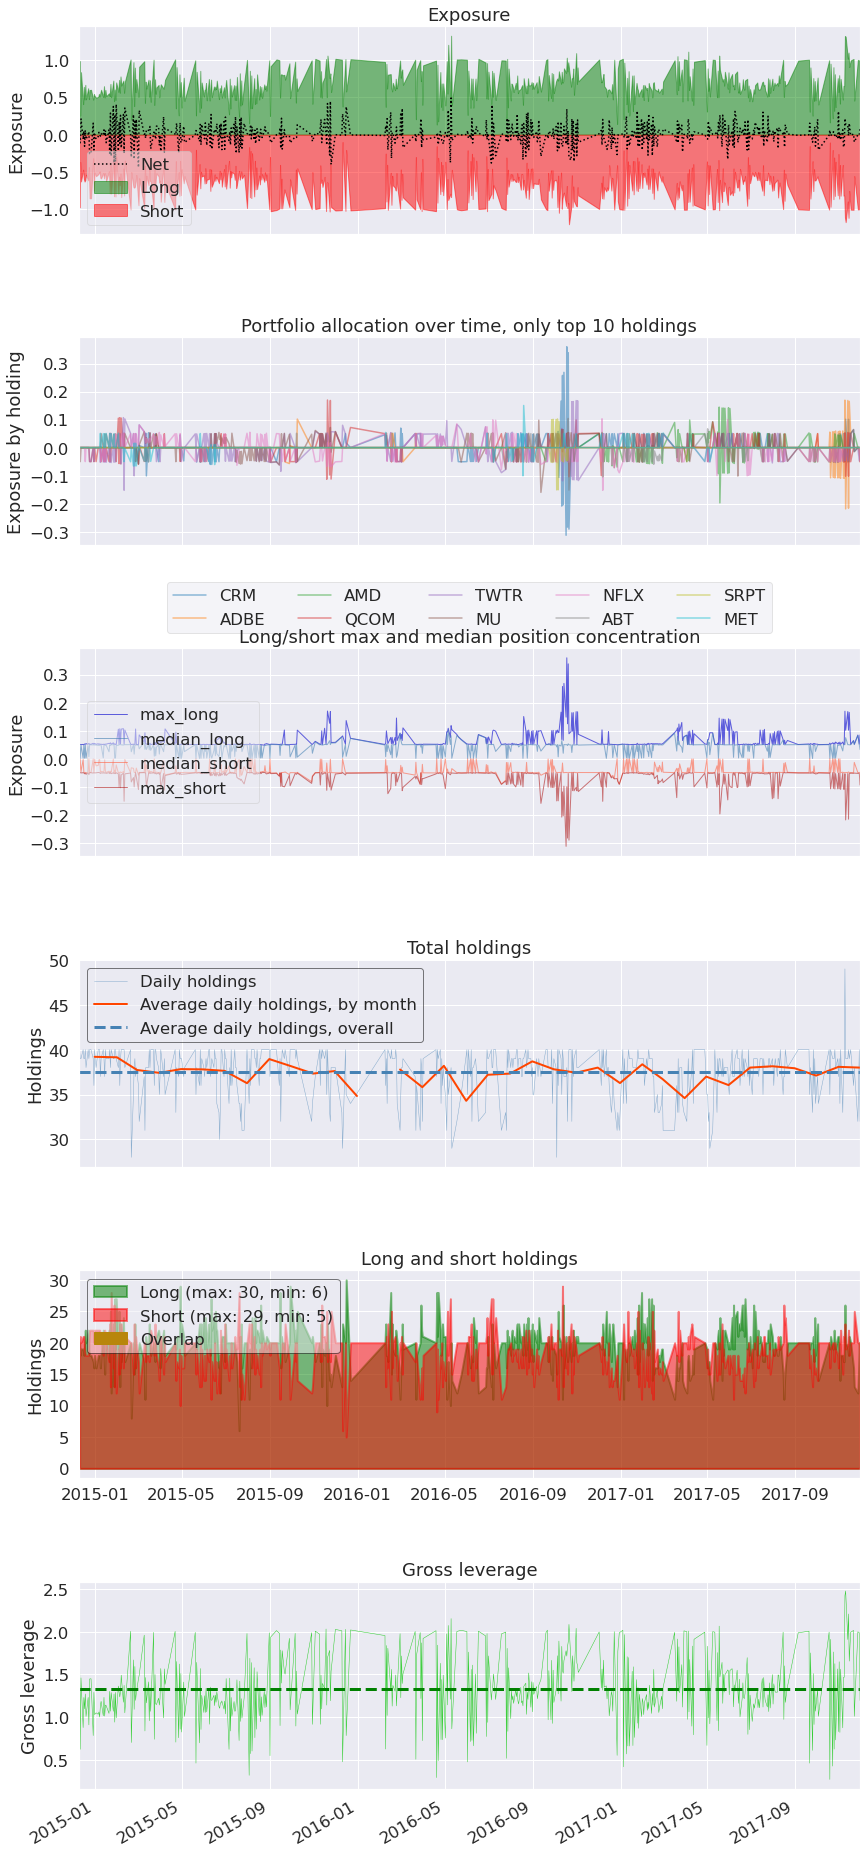

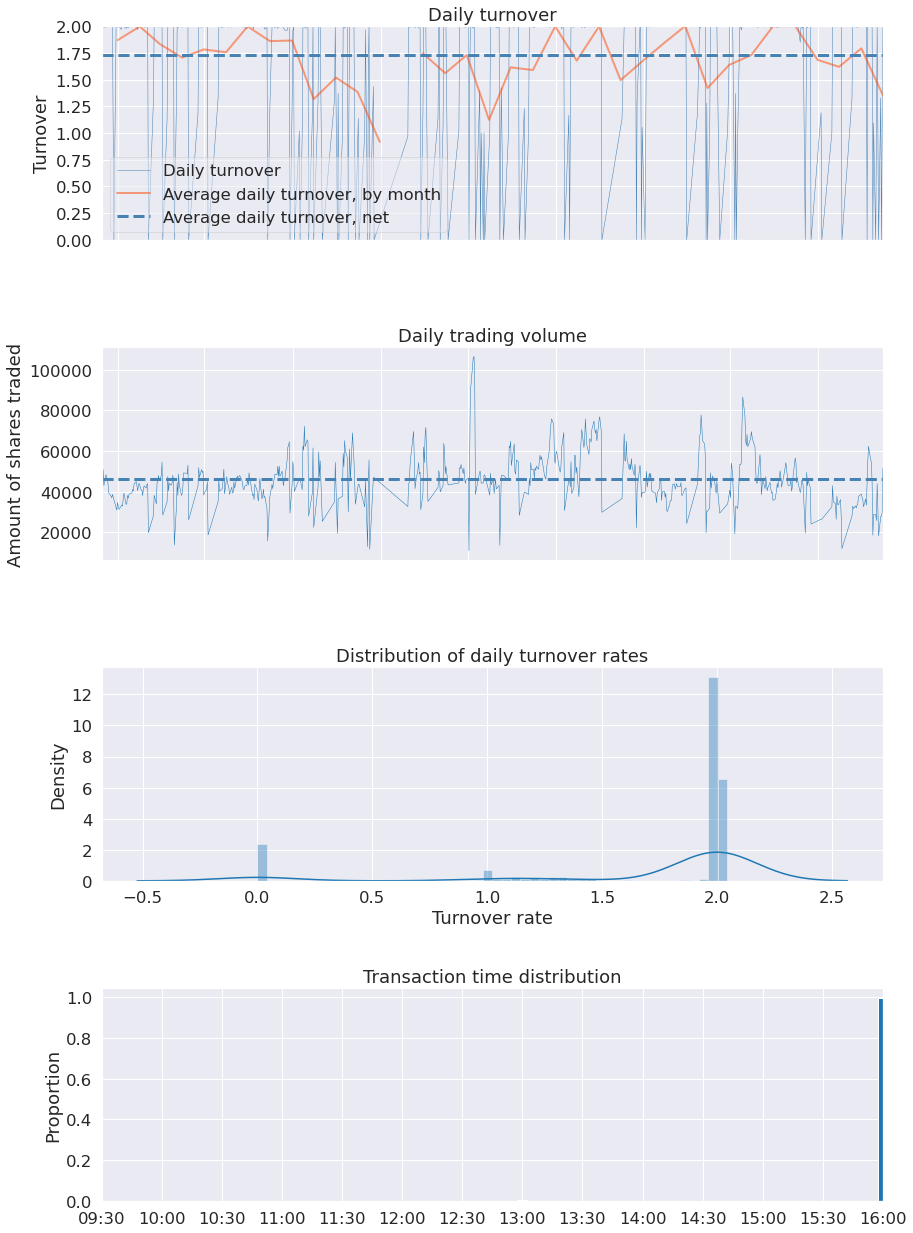

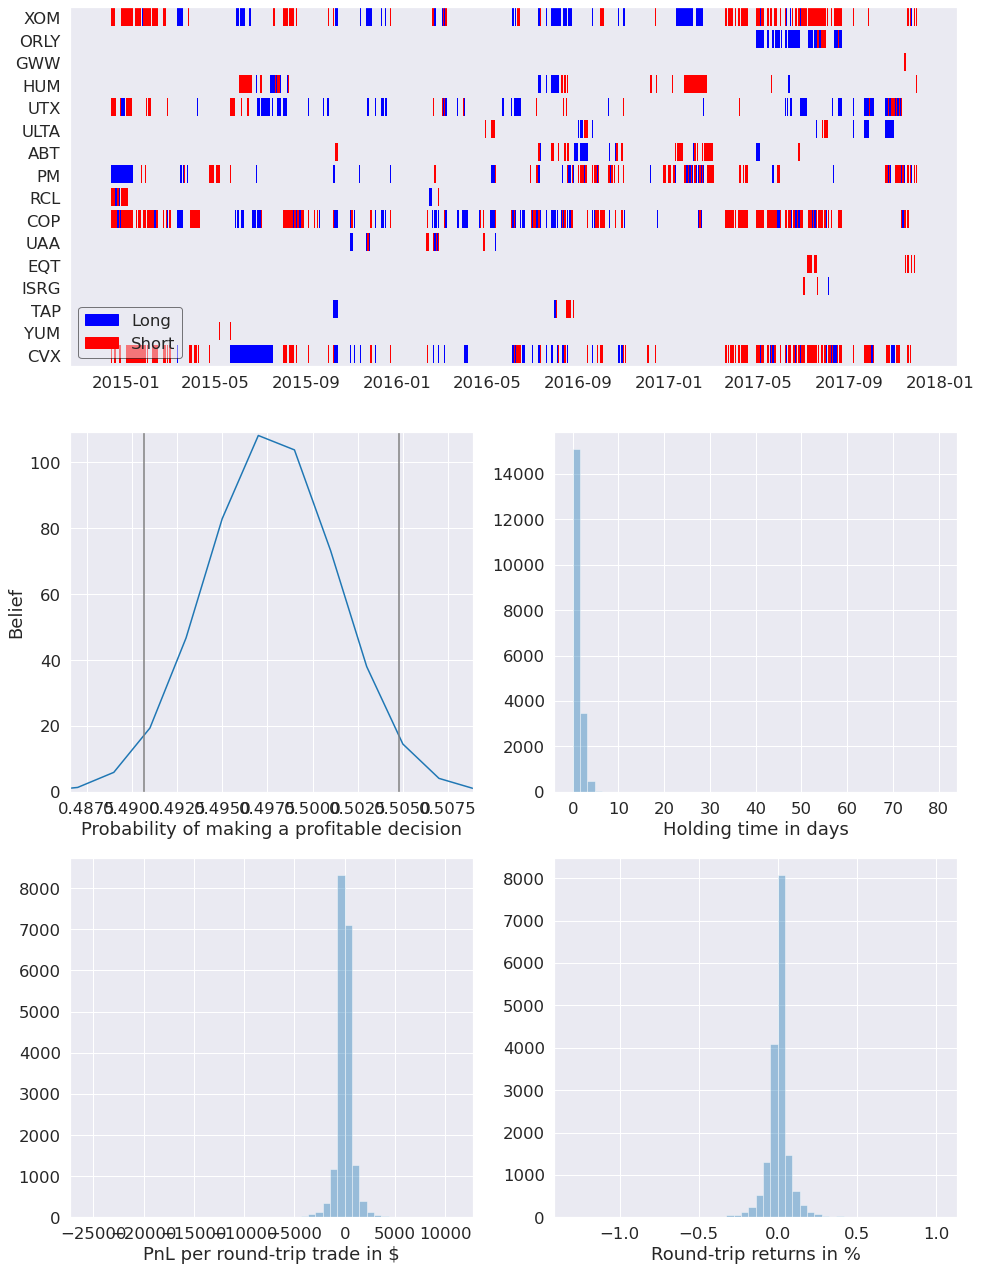

In [ ]:
pf.create_full_tear_sheet(returns,
                          positions=positions,
                          transactions=transactions,
                          benchmark_rets=benchmark,
                          live_start_date=LIVE_DATE,
                          round_trips=True)

### 백테스트 중 모델을 훈련하는 방법
- 모델 훈련을 백테스트에 통합할 수 있다.
- 03_ml4t_with_zipline.ipynb

# ML4T Workflow with zipline

We can also integrate the model training into our backtest. The goal is to replicate the daily return predictions we used in [backtesting_with_zipline](02_backtesting_with_zipline.ipynb) and generated in [Chapter 7](../../07_linear_models).

We will, however, use a few additional Pipeline factors to illustrate their usage. The principal new element is a CustomFactor that receives features and returns as inputs to train a model and produce predictions. We follow the workflow displayed in the following figure:

![ML4T with Zipline](../../assets/zip_pipe_model_flow.png "ML4T Workflow with Zipline")

## Imports and Settings

### Imports

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from collections import OrderedDict
from time import time

import numpy as np
import pandas as pd
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr

from logbook import Logger, StderrHandler, INFO

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from zipline.pipeline import Pipeline, CustomFactor
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.factors import AverageDollarVolume, EWMA, Returns
from zipline.pipeline.factors.technical import RSI, MACDSignal, TrueRange
from zipline import run_algorithm
from zipline.api import (attach_pipeline, pipeline_output,
                         date_rules, time_rules,
                         schedule_function, commission, slippage,
                         set_slippage, set_commission,
                         record,
                         order_target, order_target_percent)

import pyfolio as pf
from pyfolio.plotting import plot_rolling_returns, plot_rolling_sharpe
from pyfolio.timeseries import forecast_cone_bootstrap

In [ ]:
sns.set_style('whitegrid')

### Logging Setup

In [ ]:
log_handler = StderrHandler(
        format_string='[{record.time:%Y-%m-%d %H:%M:%S.%f}]: ' +
                      '{record.level_name}: {record.func_name}: {record.message}',
        level=INFO
)
log_handler.push_application()
log = Logger('Algorithm')

### Algo Parameters

In [ ]:
# Target long/short positions
N_LONGS = 25
N_SHORTS = 25
MIN_POSITIONS = 15

UNIVERSE = 250

# Length of the training period (memory-intensive due to pre-processing)
TRAINING_PERIOD = 252 * 2

# train to predict N day forward returns
N_FORWARD_DAYS = 1

# How often to trade; align with prediction horizon
# for weekly, set to date_rules.week_start(days_offset=1)
TRADE_FREQ = date_rules.every_day()

In [ ]:
start = pd.Timestamp('2015-01-01', tz='UTC')
end = pd.Timestamp('2017-12-31', tz='UTC')

## Factor Engineering

To create a Pipeline Factor, we need one or more input variables, a window_length that indicates the number of most recent data points for each input and security, and the computation we want to conduct.

We will use ten custom and built-in factors as features for our model to capture risk factors like momentum and volatility. Next, we’ll come up with a CustomFactor that trains our model.

### Momentum

In [ ]:
def Price_Momentum_3M():
    return Returns(window_length=63)

In [ ]:
def Returns_39W():
    return Returns(window_length=215)

### Volatility

In [ ]:
class Vol_3M(CustomFactor):
    # 3 months volatility
    inputs = [Returns(window_length=2)]
    window_length = 63

    def compute(self, today, assets, out, rets):
        out[:] = np.nanstd(rets, axis=0)

### Mean Reversion

In [ ]:
class Mean_Reversion_1M(CustomFactor):
    # standardized difference between latest monthly return
    # and their annual average
    inputs = [Returns(window_length=21)]
    window_length = 252

    def compute(self, today, assets, out, monthly_rets):
        out[:] = (monthly_rets[-1] - np.nanmean(monthly_rets, axis=0)) / \
                 np.nanstd(monthly_rets, axis=0)

### Money Flow Volume

In [ ]:
class Moneyflow_Volume_5d(CustomFactor):
    inputs = [USEquityPricing.close, USEquityPricing.volume]
    window_length = 5

    def compute(self, today, assets, out, close, volume):

        mfvs = []

        for col_c, col_v in zip(close.T, volume.T):

            # denominator
            denominator = np.dot(col_c, col_v)

            # numerator
            numerator = 0.
            for n, price in enumerate(col_c.tolist()):
                if price > col_c[n - 1]:
                    numerator += price * col_v[n]
                else:
                    numerator -= price * col_v[n]

            mfvs.append(numerator / denominator)
        out[:] = mfvs

### Price Trend

A linear price trend that we estimate using linear regression (see [Chapter 7](../../07_linear_models) works as follows: we use the 252 latest close prices to compute the regression coefficient on a linear time trend:

In [ ]:
class Trendline(CustomFactor):
    # linear 12 month price trend regression
    inputs = [USEquityPricing.close]
    window_length = 252

    def compute(self, today, assets, out, close):
        X = np.arange(self.window_length).reshape(-1, 1).astype(float)
        X -= X.mean()
        Y = close - np.nanmean(close, axis=0)
        out[:] = (X.T @ Y / np.var(X)) / self.window_length

### Price Oscillator

In [ ]:
class Price_Oscillator(CustomFactor):
    inputs = [USEquityPricing.close]
    window_length = 252

    def compute(self, today, assets, out, close):
        four_week_period = close[-20:]
        out[:] = (np.nanmean(four_week_period, axis=0) /
                  np.nanmean(close, axis=0)) - 1.

### Combine Features

In [ ]:
vol_3M = Vol_3M()
mean_reversion_1M = Mean_Reversion_1M()
macd_signal_10d = MACDSignal()
moneyflow_volume_5d = Moneyflow_Volume_5d()
trendline = Trendline()
price_oscillator = Price_Oscillator()
price_momentum_3M = Price_Momentum_3M()
returns_39W = Returns_39W()
true_range = TrueRange()

In [ ]:
features = {
    'Vol 3M'             : vol_3M,
    'Mean Reversion 1M'  : mean_reversion_1M,
    'MACD Signal 10d'    : macd_signal_10d,
    'Moneyflow Volume 5D': moneyflow_volume_5d,
    'Trendline'          : trendline,
    'Price Oscillator'   : price_oscillator,
    'Price Momentum 3M'  : price_momentum_3M,
    '39 Week Returns'    : returns_39W,
    'True Range'         : true_range
}

## ML CustomFactor

Our `CustomFactor` called LinearModel will have the `StandardScaler` and a stochastic gradient descent (SGD) implementation of ridge regression as instance attributes, and we will train the model on three days a week.

- The `compute` method generates predictions (addressing potential missing values), but first checks if the model should be trained.
- The `_train_model` method is the centerpiece of the puzzle. It shifts the returns and aligns the resulting forward returns with the Factor features, removing missing values in the process. It scales the remaining data points and trains the linear SGDRegressor.

In [ ]:
class LinearModel(CustomFactor):
    """Obtain model predictions"""
    train_on_weekday = [0, 2, 4]

    def __init__(self, *args, **kwargs):
        super().__init__(self, *args, **kwargs)

        self._scaler = StandardScaler()
        self._model = SGDRegressor(penalty='L2')
        self._trained = False

    def _train_model(self, today, returns, inputs):

        scaler = self._scaler
        model = self._model

        shift_by = N_FORWARD_DAYS + 1
        outcome = returns[shift_by:].flatten()
        features = np.dstack(inputs)[:-shift_by]
        n_days, n_stocks, n_features = features.shape
        features = features.reshape(-1, n_features)
        features = features[~np.isnan(outcome)]
        outcome = outcome[~np.isnan(outcome)]
        outcome = outcome[np.all(~np.isnan(features), axis=1)]
        features = features[np.all(~np.isnan(features), axis=1)]
        features = scaler.fit_transform(features)

        start = time()
        model.fit(X=features, y=outcome)
#         log.info('{} | {:.2f}s'.format(today.date(), time() - start))
        self._trained = True

    def _maybe_train_model(self, today, returns, inputs):
        if (today.weekday() in self.train_on_weekday) or not self._trained:
            self._train_model(today, returns, inputs)

    def compute(self, today, assets, out, returns, *inputs):
        self._maybe_train_model(today, returns, inputs)

        # Predict most recent feature values
        X = np.dstack(inputs)[-1]
        missing = np.any(np.isnan(X), axis=1)
        X[missing, :] = 0
        X = self._scaler.transform(X)
        preds = self._model.predict(X)
        out[:] = np.where(missing, np.nan, preds)

## Pipeline

The `make_ml_pipeline()` function preprocesses and combines the outcome, feature, and model parts into a Pipeline with a column for predictions.

In [ ]:
def make_ml_pipeline(universe, window_length=21, n_forward_days=5):
    pipeline_columns = OrderedDict()

    # ensure that returns is the first input
    pipeline_columns['Returns'] = Returns(inputs=[USEquityPricing.open],
                                          mask=universe,
                                          window_length=n_forward_days + 1)

    # convert factors to ranks; append to pipeline
    pipeline_columns.update({k: v.rank(mask=universe)
                             for k, v in features.items()})

    # Create ML pipeline factor.
    # window_length = length of the training period
    pipeline_columns['predictions'] = LinearModel(inputs=pipeline_columns.values(),
                                         window_length=window_length + n_forward_days,
                                         mask=universe)

    return Pipeline(screen=universe, columns=pipeline_columns)

## Universe

In [ ]:
def make_universe():
    # Set screen
    dollar_volume = AverageDollarVolume(window_length=90)
    return dollar_volume.top(UNIVERSE)

In [ ]:
universe = make_universe()

## Initialize Algorithm

In [ ]:
def initialize(context):
    """
    Called once at the start of the algorithm.
    """

    set_slippage(slippage.FixedSlippage(spread=0.00))
    set_commission(commission.PerShare(cost=0, min_trade_cost=0))

    schedule_function(rebalance, TRADE_FREQ,
                      date_rules.every_day(),
                      time_rules.market_open(hours=1, minutes=30),
    )

    schedule_function(record_vars, date_rules.every_day(),
                      time_rules.market_close())

    ml_pipeline = make_ml_pipeline(universe,
                                   n_forward_days=N_FORWARD_DAYS,
                                   window_length=TRAINING_PERIOD)

    # Create our dynamic stock selector.
    attach_pipeline(ml_pipeline, 'ml_model')

    context.past_predictions = {}
    context.ic = 0
    context.rmse = 0
    context.mae = 0
    context.returns_spread_bps = 0

## Evaluate Predictive Accuracy

The `evaluate_predictions()` function does exactly this: it tracks the past predictions of our model and evaluates them once returns for the relevant time horizon materialize (in our example the next day):

In [ ]:
def evaluate_predictions(output, context):
    # Look at past predictions to evaluate model performance
    # A day has passed, shift days and drop old ones
    context.past_predictions = {
        k - 1: v for k, v in context.past_predictions.items() if k > 0
    }

    if 0 in context.past_predictions:

        # Use today's n-day returns to evaluate predictions
        returns, predictions = (output['Returns'].dropna()
                                .align(context.past_predictions[0].dropna(),
                                       join='inner'))
        if len(returns) > 0 and len(predictions) > 0:
            context.ic = spearmanr(returns, predictions)[0]
            context.rmse = np.sqrt(
                mean_squared_error(returns, predictions))
            context.mae = mean_absolute_error(returns, predictions)

            long_rets = returns[predictions > 0].mean()
            short_rets = returns[predictions < 0].mean()
            context.returns_spread_bps = (long_rets - short_rets) * 10000

    # Store current predictions
    context.past_predictions[N_FORWARD_DAYS] = context.predicted_returns

## Get Pipeline Output

We obtain new predictions using the `before_trading_start()` function that runs every morning before market open:

In [ ]:
def before_trading_start(context, data):
    """
    Called every day before market open.
    """
    output = pipeline_output('ml_model')
    context.predicted_returns = output['predictions']
    context.predicted_returns.index.set_names(['equity'], inplace=True)

    evaluate_predictions(output, context)

    # These are the securities that we are interested in trading each day.
    context.security_list = context.predicted_returns.index

## Rebalance

In [ ]:
def rebalance(context, data):
    """
    Execute orders according to our schedule_function() timing.
    """
    predictions = context.predicted_returns

    # Drop stocks that can not be traded
    predictions = predictions.loc[data.can_trade(predictions.index)]
    longs = (predictions[predictions > 0]
             .sort_values(ascending=False)[:N_LONGS]
             .index
             .tolist())
    shorts = (predictions[predictions < 0]
              .sort_values()[:N_SHORTS]
              .index
              .tolist())
    targets = set(longs + shorts)
    for position in context.portfolio.positions:
        if position not in targets:
            order_target(position, 0)

    n_longs, n_shorts = len(longs), len(shorts)
    if n_longs > MIN_POSITIONS and n_shorts > MIN_POSITIONS:
        for stock in longs:
            order_target_percent(stock, target=1/n_longs)
        for stock in shorts:
            order_target_percent(stock, target=-1/n_shorts)
    else:
        for stock in targets:
            if stock in context.portfolio.positions:
                order_target(stock, 0)

## Logging

In [ ]:
def record_vars(context, data):
    """
    Plot variables at the end of each day.
    """
    record(
            leverage=context.account.leverage,
            ic=context.ic,
            rmse=context.rmse,
            mae=context.mae,
            returns_spread_bps=context.returns_spread_bps
    )

## Run Algo

In [ ]:
go = time()
results = run_algorithm(start=start,
                        end=end,
                        initialize=initialize,
                        before_trading_start=before_trading_start,
                        capital_base=1e6,
                        data_frequency='daily',
                        benchmark_returns=None,
                        bundle='quandl')

print('{:.2f}'.format(time()-go))

[2021-04-15 20:35:21.712263]: WARNING: _can_order_asset: Cannot place order for COV, as it has de-listed. Any existing positions for this asset will be liquidated on 2015-01-27 00:00:00+00:00.
[2021-04-15 20:35:31.205477]: INFO: handle_split: after split: asset: Equity(2509 [SBUX]), amount: 826, cost_basis: 47.04, last_sale_price: 95.23
[2021-04-15 20:35:31.205864]: INFO: handle_split: returning cash: 0.0
[2021-04-15 20:36:09.732804]: WARNING: _can_order_asset: Cannot place order for CTRX, as it has de-listed. Any existing positions for this asset will be liquidated on 2015-07-24 00:00:00+00:00.
[2021-04-15 20:36:31.022819]: INFO: handle_split: after split: asset: Equity(1992 [NKE]), amount: 526, cost_basis: 65.92, last_sale_price: 128.71
[2021-04-15 20:36:31.023204]: INFO: handle_split: returning cash: 0.0
[2021-04-15 20:36:58.833296]: WARNING: _can_order_asset: Cannot place order for ACE, as it has de-listed. Any existing positions for this asset will be liquidated on 2016-01-15 00:0

313.17


## Analyze using PyFolio

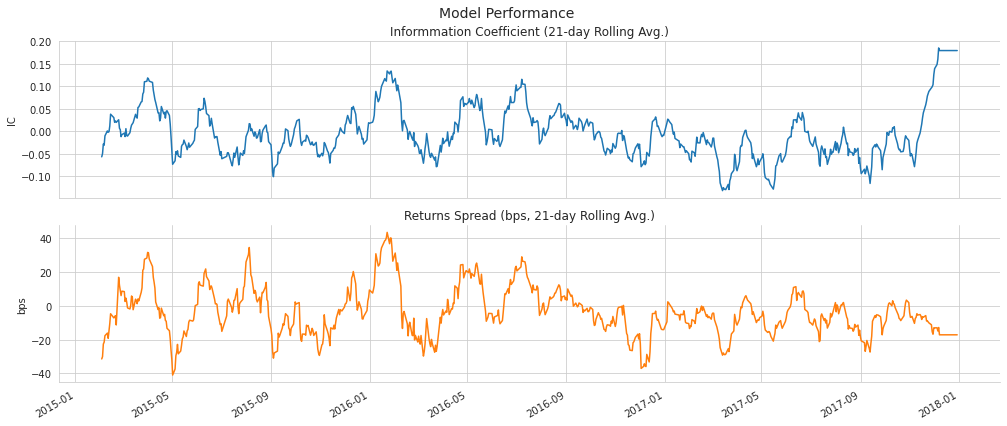

In [ ]:
axes = (results[['ic', 'returns_spread_bps']]
        .dropna()
        .rolling(21)
        .mean()
        .plot(subplots=True,
              layout=(2,1),
              figsize=(14, 6),
              title=['Informmation Coefficient (21-day Rolling Avg.)', 'Returns Spread (bps, 21-day Rolling Avg.)'],
              legend=False))
axes = axes.flatten()
axes[0].set_ylabel('IC')
axes[1].set_ylabel('bps')
plt.suptitle('Model Performance', fontsize=14)
sns.despine()
plt.tight_layout()
plt.subplots_adjust(top=.9);

### Get PyFolio Input

In [ ]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(results)

### Get Benchmark Data

In [ ]:
benchmark = web.DataReader('SP500', 'fred', '2014', '2018').squeeze()
benchmark = benchmark.pct_change().tz_localize('UTC')

### Custom Performance Plots

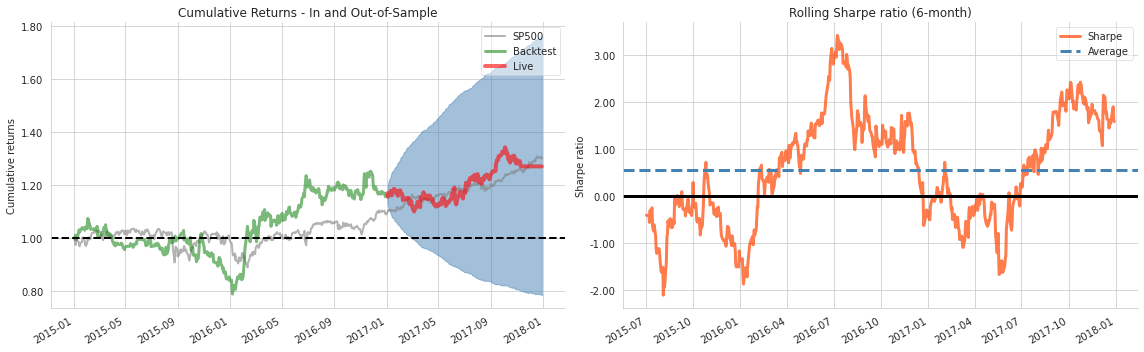

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
plot_rolling_returns(returns,
                     factor_returns=benchmark,
                     live_start_date='2017-01-01',
                     logy=False,
                     cone_std=2,
                     legend_loc='best',
                     volatility_match=False,
                     cone_function=forecast_cone_bootstrap,
                    ax=axes[0])
plot_rolling_sharpe(returns, ax=axes[1])
axes[0].set_title('Cumulative Returns - In and Out-of-Sample')
sns.despine()
fig.tight_layout();

### Full Tearsheet

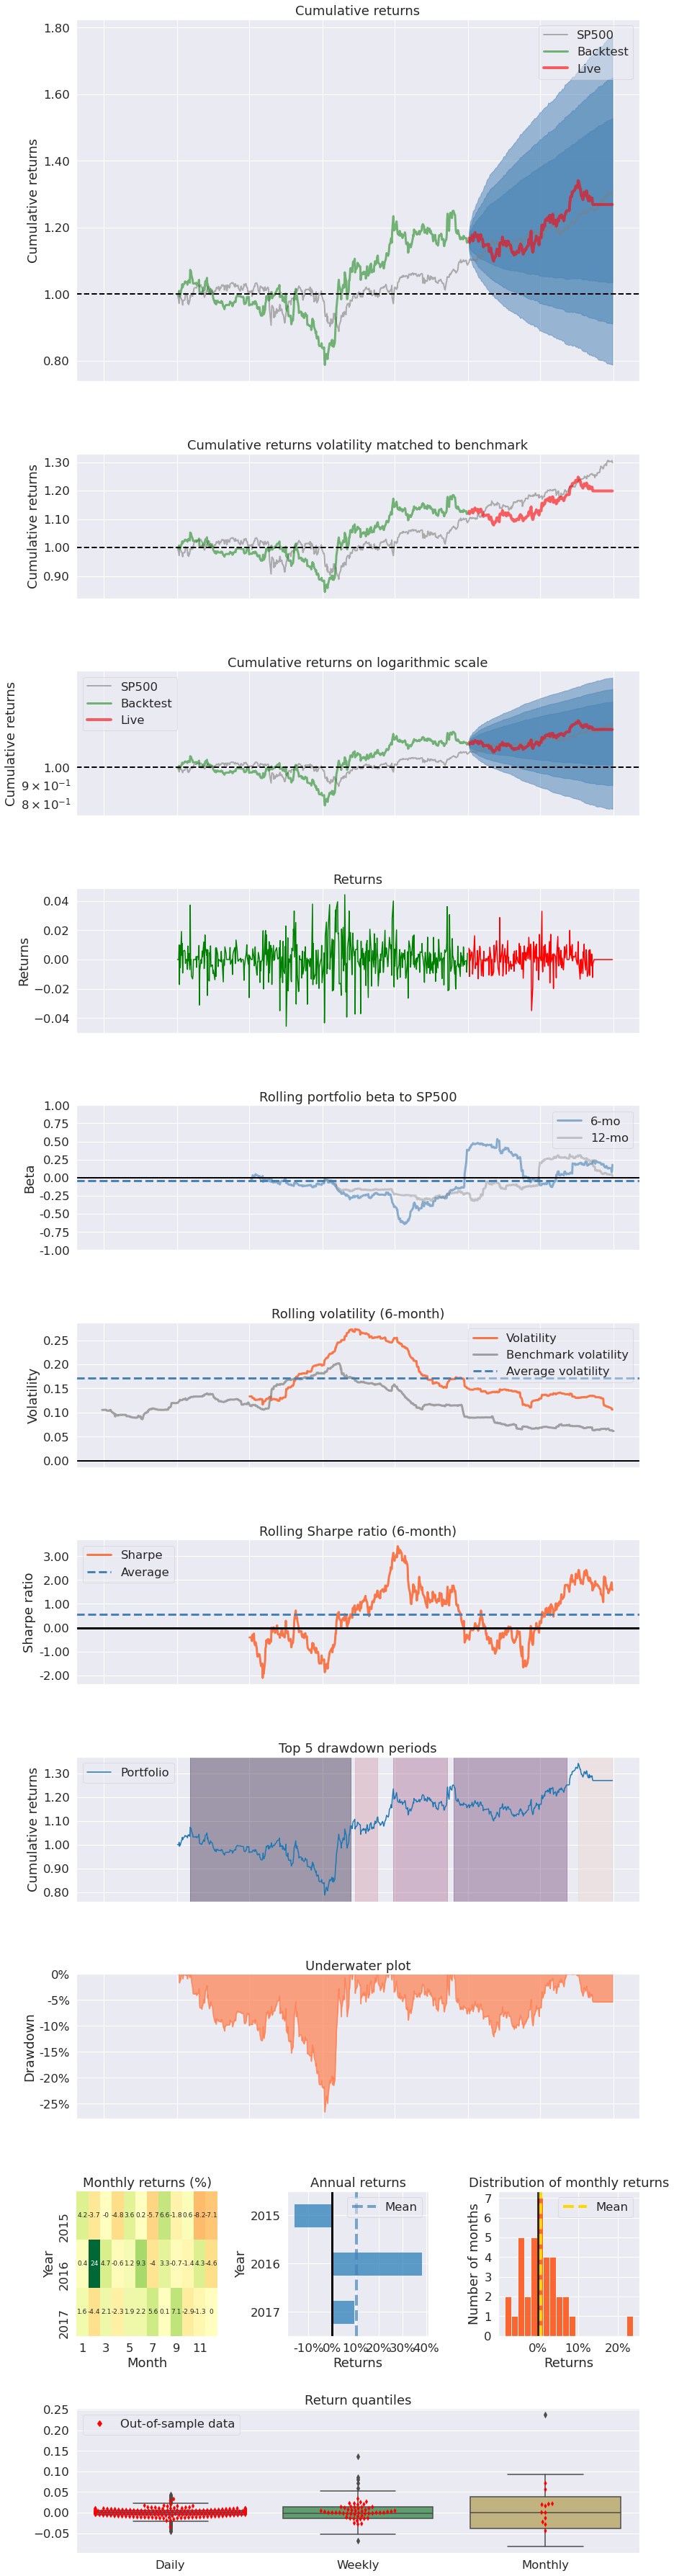

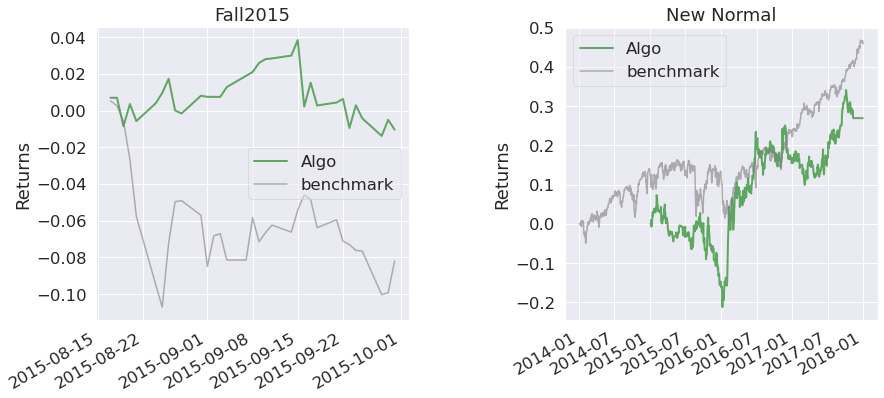

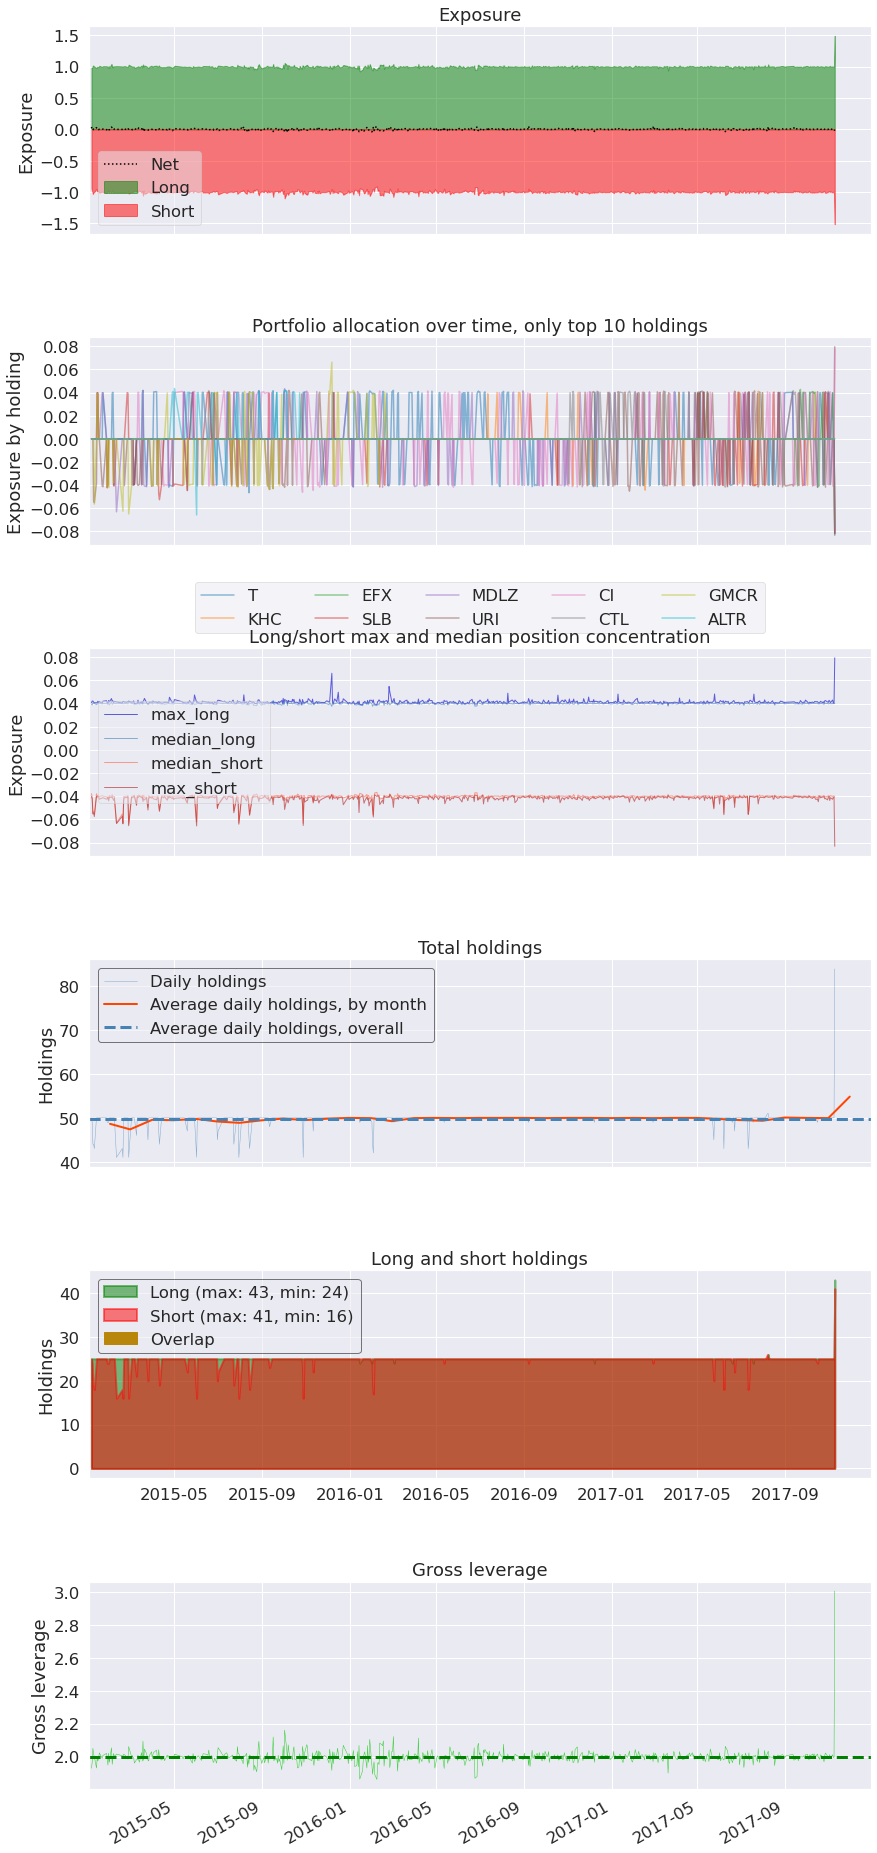

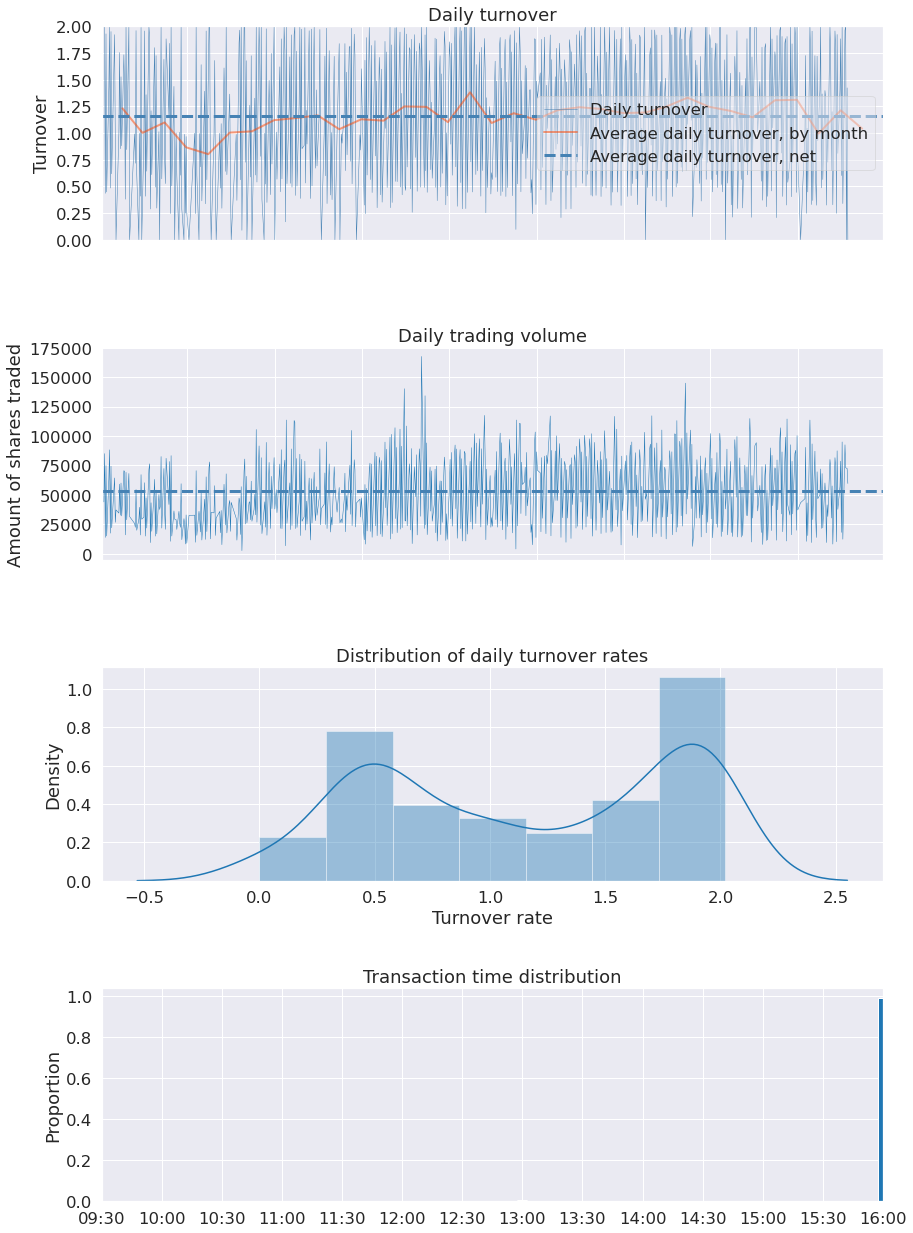

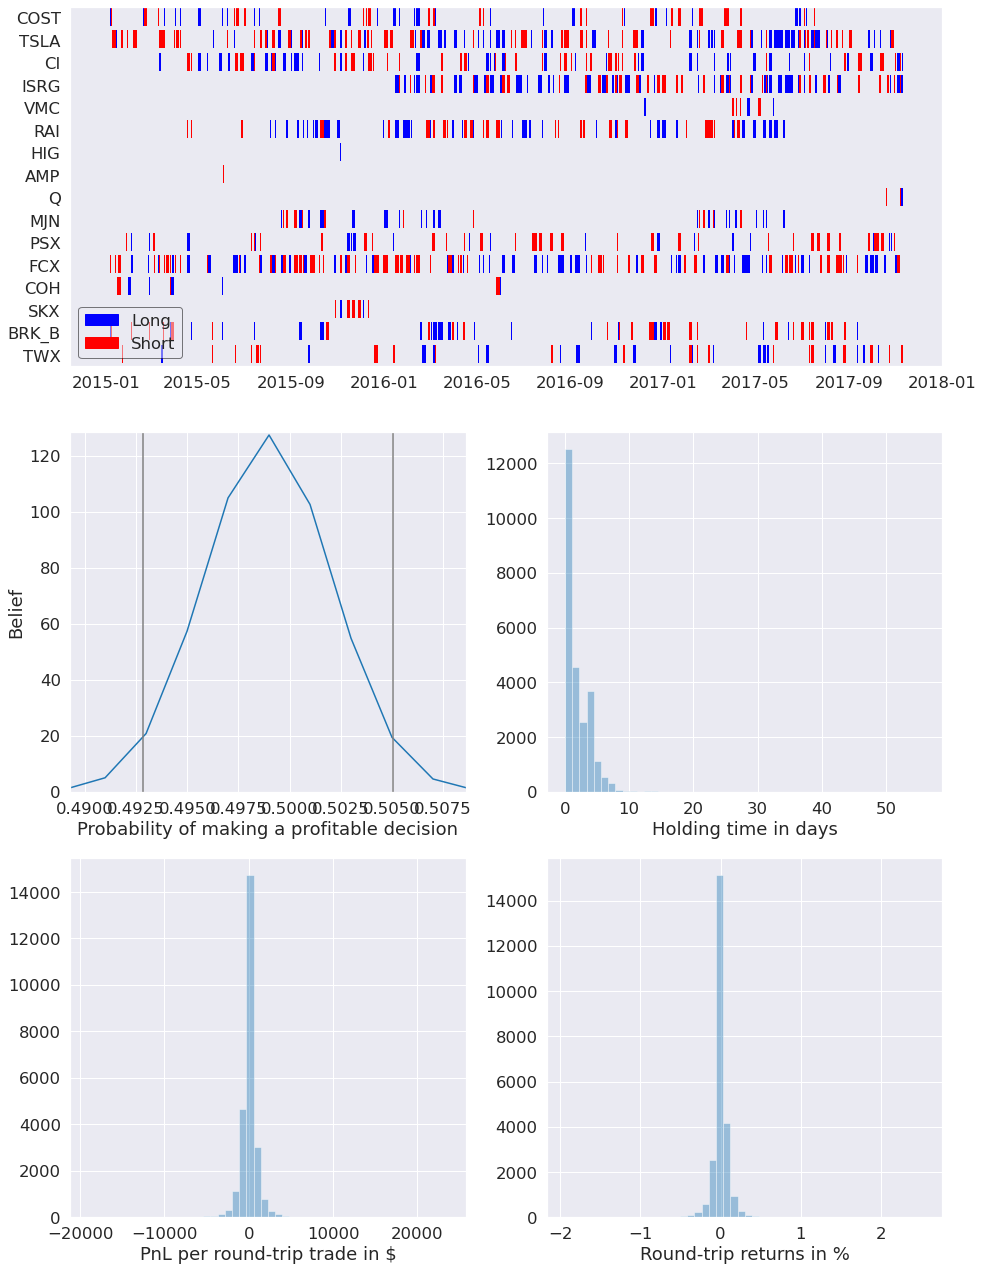

In [ ]:
pf.create_full_tear_sheet(returns,
                          positions=positions,
                          transactions=transactions,
                          benchmark_rets=benchmark,
                          live_start_date='2017-01-01',
                          round_trips=True)